# **Analysez les ventes de la librairie en ligne Lapage**

In [ ]:
# **Etape 1 - Importation des librairies et chargement des fichiers**

In [56]:
# Importation des packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import datetime
from datetime import datetime, date
import seaborn as sns
from scipy.stats import chi2_contingency
from scipy.stats import pearsonr
import statsmodels.api as sm
import scipy.stats as stats
from scipy.stats import shapiro

In [57]:
#Importation du fichier customers.csv
customers = pd.read_csv('customers.csv', sep=';')
#Importation du fichier products.csv
products = pd.read_csv('products.csv', sep=';')
# Importation du fichier CSV avec l'option low_memory=False
transactions = pd.read_csv('transactions.csv', sep=';', low_memory=False)

# **Etape 2 - Analyse exploratoire des fichiers**

**2.1 - Analyse exploratoire du fichier customers.csv**

In [58]:
#Afficher les dimensions du dataset
print("Le tableau comporte {} observation(s) ou article(s)".format(customers.shape[0]))
print("Le tableau comporte {} colonne(s)".format(customers.shape[1]))

Le tableau comporte 8621 observation(s) ou article(s)
Le tableau comporte 3 colonne(s)


In [59]:
#Consulter le nombre de colonnes
#La nature des données dans chacune des colonnes
#Le nombre de valeurs présentes dans chacune des colonnes
for i in customers.columns:
    print ("---- %s ---" % i)
    print(customers[i].value_counts())

---- client_id ---
client_id
c_4410    1
c_5441    1
c_5140    1
c_7935    1
c_7514    1
         ..
c_6726    1
c_2797    1
c_818     1
c_3393    1
c_84      1
Name: count, Length: 8621, dtype: int64
---- sex ---
sex
f    4490
m    4131
Name: count, dtype: int64
---- birth ---
birth
2004    440
1979    215
1988    207
1986    203
1978    199
       ... 
1933      8
1932      6
1931      4
1930      4
1929      3
Name: count, Length: 76, dtype: int64


In [60]:
#vérification des doublons dans l'identifiant
customers.loc[customers['client_id'].duplicated(keep=False),:]

,client_id,sex,birth


In [61]:
#vérification des valeurs max, min pour 'birth'
customers.describe()
#data de naissance comprise entre 1929 et 2004, pas de valeurs négatives ou incohérentes

,birth
count,8621.000000
mean,1978.275606
std,16.917958
min,1929.000000
25%,1966.000000
50%,1979.000000
75%,1992.000000
max,2004.000000


**2.2 - Analyse exploratoire du fichier products.csv**

In [62]:
products.loc[products['price'] <= 0, ]

,id_prod,price,categ


In [63]:
#Afficher les dimensions du dataset
print("Le tableau comporte {} observation(s) ou article(s)".format(products.shape[0]))
print("Le tableau comporte {} colonne(s)".format(products.shape[1]))

Le tableau comporte 3286 observation(s) ou article(s)
Le tableau comporte 3 colonne(s)


In [64]:
#Consulter le nombre de colonnes
#La nature des données dans chacune des colonnes
#Le nombre de valeurs présentes dans chacune des colonnes
for i in products.columns:
    print ("---- %s ---" % i)
    print(products[i].value_counts())

---- id_prod ---
id_prod
0_1421    1
0_2298    1
0_870     1
0_1785    1
0_1876    1
         ..
0_2155    1
0_1118    1
2_12      1
2_20      1
0_1920    1
Name: count, Length: 3286, dtype: int64
---- price ---
price
4.99      85
6.99      84
3.99      80
5.99      78
8.99      74
          ..
155.99     1
6.50       1
5.40       1
10.89      1
25.16      1
Name: count, Length: 1454, dtype: int64
---- categ ---
categ
0    2308
1     739
2     239
Name: count, dtype: int64


In [65]:
#vérification des doublons dans l'identifiant
products.loc[products['id_prod'].duplicated(keep=False),:]

,id_prod,price,categ


In [66]:
#vérification des valeurs max, min, interquartiles, etc. pour 'price'
products.describe()
#prix compris entre 0.62 et 300, pas de valeurs négatives

,price,categ
count,3286.000000,3286.000000
mean,21.863597,0.370359
std,29.849786,0.615446
min,0.620000,0.000000
25%,6.990000,0.000000
50%,13.075000,0.000000
75%,22.990000,1.000000
max,300.000000,2.000000


**2.3 - Analyse exploratoire du fichier Transactions.csv**

In [67]:
# Vérification des doublons dans la colonne 'id_prod'
doublons_transactions = transactions[transactions['id_prod'].duplicated(keep=False)]

# Affichage des lignes avec des doublons
print(doublons_transactions)

        id_prod                        date session_id client_id
0        0_1259  2021-03-01 00:01:07.843138        s_1     c_329
1        0_1390  2021-03-01 00:02:26.047414        s_2     c_664
2        0_1352  2021-03-01 00:02:38.311413        s_3     c_580
3        0_1458  2021-03-01 00:04:54.559692        s_4    c_7912
4        0_1358  2021-03-01 00:05:18.801198        s_5    c_2033
...         ...                         ...        ...       ...
1048570     NaN                         NaN        NaN       NaN
1048571     NaN                         NaN        NaN       NaN
1048572     NaN                         NaN        NaN       NaN
1048573     NaN                         NaN        NaN       NaN
1048574     NaN                         NaN        NaN       NaN

[1048557 rows x 4 columns]


In [68]:
# Supprimer les lignes à partir de la ligne 687534 incluse
transactions = transactions.iloc[:687534]

# Vérifier le résultat
print(transactions)

       id_prod                        date session_id client_id
0       0_1259  2021-03-01 00:01:07.843138        s_1     c_329
1       0_1390  2021-03-01 00:02:26.047414        s_2     c_664
2       0_1352  2021-03-01 00:02:38.311413        s_3     c_580
3       0_1458  2021-03-01 00:04:54.559692        s_4    c_7912
4       0_1358  2021-03-01 00:05:18.801198        s_5    c_2033
...        ...                         ...        ...       ...
687529   1_508  2023-02-28 23:49:03.148402   s_348444    c_3573
687530    2_37  2023-02-28 23:51:29.318531   s_348445      c_50
687531   1_695  2023-02-28 23:53:18.929676   s_348446     c_488
687532  0_1547  2023-02-28 23:58:00.107815   s_348447    c_4848
687533  0_1398  2023-02-28 23:58:30.792755   s_348435    c_3575

[687534 rows x 4 columns]


In [69]:
# Compter les occurrences de chaque valeur dans la colonne 'id_prod'
counts = transactions['id_prod'].value_counts()

# Filtrer les valeurs qui se répètent (c'est-à-dire celles dont le compte est supérieur à 1)
duplicate_counts = counts[counts > 1]

# Afficher les résultats
print(duplicate_counts)

id_prod
1_369     2340
1_417     2269
1_414     2246
1_498     2202
1_425     2163
          ... 
0_1279       2
0_2257       2
0_453        2
0_1233       2
1_402        2
Name: count, Length: 3247, dtype: int64


In [70]:
#Afficher les dimensions du dataset
print("Le tableau comporte {} observation(s) ou article(s)".format(transactions.shape[0]))
print("Le tableau comporte {} colonne(s)".format(transactions.shape[1]))

Le tableau comporte 687534 observation(s) ou article(s)
Le tableau comporte 4 colonne(s)


In [71]:
#Consulter le nombre de colonnes
#La nature des données dans chacune des colonnes
#Le nombre de valeurs présentes dans chacune des colonnes
for i in transactions.columns:
    print ("---- %s ---" % i)
    print(transactions[i].value_counts())

---- id_prod ---
id_prod
1_369     2340
1_417     2269
1_414     2246
1_498     2202
1_425     2163
          ... 
2_23         1
0_886        1
0_833        1
0_2201       1
0_1633       1
Name: count, Length: 3265, dtype: int64
---- date ---
date
2021-10-06 21:29:59.752585    2
2021-10-03 11:54:55.781188    2
2021-10-02 11:15:57.721668    2
2021-10-02 05:19:54.362297    2
2021-10-03 04:42:59.898075    2
                             ..
2021-11-04 15:58:44.482012    1
2021-11-04 15:58:46.588968    1
2021-11-04 16:03:26.769876    1
2021-11-04 16:05:55.252770    1
2023-02-28 23:58:30.792755    1
Name: count, Length: 687419, dtype: int64
---- session_id ---
session_id
s_118668    14
s_215292    13
s_96857     13
s_342045    13
s_179575    13
            ..
s_156487     1
s_156489     1
s_156491     1
s_156493     1
s_348447     1
Name: count, Length: 345505, dtype: int64
---- client_id ---
client_id
c_1609    25586
c_6714     9199
c_3454     6793
c_4958     5222
c_2140      405
          

# **Etape 3 - Jonction des fichiers**

**Etape 3.1 - Jonction du fichier customers et transactions**

In [72]:
#Fusion des fichiers customers et transactions
df_merge = pd.merge(customers, transactions, on='client_id', how='right')
#on a 3286 clients dans 'customers', mais seulement 3265 clients dans 'transactions' => jointure à droite (si on fait à gauche on a 21 valeurs sans match)
#vérification valeurs nulles dans le df = False
df_merge.isnull().values.any()

False

In [73]:
df_merge

,client_id,sex,birth,id_prod,date,session_id
0,c_329,f,1967,0_1259,2021-03-01 00:01:07.843138,s_1
1,c_664,m,1960,0_1390,2021-03-01 00:02:26.047414,s_2
2,c_580,m,1988,0_1352,2021-03-01 00:02:38.311413,s_3
3,c_7912,f,1989,0_1458,2021-03-01 00:04:54.559692,s_4
4,c_2033,f,1956,0_1358,2021-03-01 00:05:18.801198,s_5
...,...,...,...,...,...,...
687529,c_3573,f,1996,1_508,2023-02-28 23:49:03.148402,s_348444
687530,c_50,f,1994,2_37,2023-02-28 23:51:29.318531,s_348445
687531,c_488,f,1985,1_695,2023-02-28 23:53:18.929676,s_348446
687532,c_4848,m,1953,0_1547,2023-02-28 23:58:00.107815,s_348447


## Etape 3.2 - Jonction du fichier df_merge et products**

In [74]:
#Fusion des fichiers customers et transactions
data = pd.merge(df_merge, products, on='id_prod', how='left')
#vérification valeurs nulles dans le df = False
data.isnull().values.any()

False

In [75]:
data.loc[data['price'] <= 0, ]

,client_id,sex,birth,id_prod,date,session_id,price,categ


**Etape 3.3 - création des colonnes age_bin et age**

In [76]:
#creation d'une variable âge
from datetime import date
today = date.today()
data['age'] = today.year - data['birth']
#mettre bon type à 'categ'
data = data.astype({'categ':'str'})

array([[<Axes: title={'center': 'age'}>]], dtype=object)

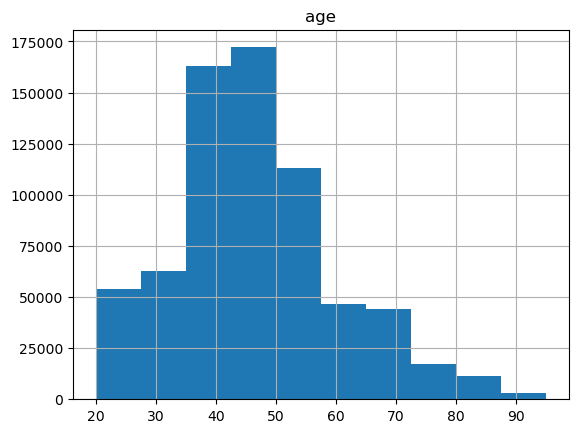

In [77]:
data.hist(column="age")

In [78]:
#creation d'une colonne 'age_bin'
#reprise des mêmes tranches que sur cette source : https://www.statista.com/statistics/249787/book-reading-population-in-the-us-by-age/
bins = [18, 30, 50, 65, 120]
labels = ['18-29', '30-49', '50-64', '65+']
data['age_bin'] = pd.cut(data['age'], bins, labels = labels,include_lowest = True)

# **Etape 4 - Analyse univariée des prix et des catégories**

**Etape 4.1 - Exploration des prix par la visualisation de données**

Text(0.5, 0, 'prix de vente')

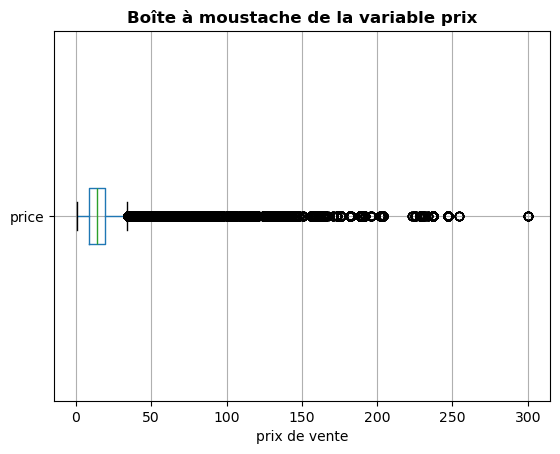

In [79]:
#Création d'une Boite à moustache de la répartition des prix grâce à Pandas
data.boxplot(column="price", vert=False)
plt.title('Boîte à moustache de la variable prix', fontweight='bold')
plt.xlabel('prix de vente')

**Etape 4.2 - Exploration par l'utisation de méthodes statistique (variable prix)**

Etape 4.2.1 - Identification par le Z-index

In [80]:
#Calculer le Z-score
from scipy import stats
data['z_score'] = stats.zscore(data.price)

In [81]:
#Quel est le seuil prix dont z-score est supérieur à 3?
z_values = data.loc[data['z_score'] > 3,:].sort_values('z_score', ascending=True)
#premier prix au-delà de 3 écarts-types = 72.42
#9459 valeurs

In [82]:
#caractérisation des outliers selon le z_score
for i in z_values.columns:
    print ("---- %s ---" % i)
    print(z_values[i].value_counts())
#essentiellement des catégories 2, 1 client à 863 achats (sur 9459), plus d'hommes a priori (? à vérifier en dessous), plus de jeunes
data['age'].mean() - z_values['age'].mean()

---- client_id ---
client_id
c_4958    863
c_6714     77
c_3580     20
c_1609     19
c_6977     18
         ... 
c_6990      1
c_1250      1
c_2525      1
c_2235      1
c_1001      1
Name: count, Length: 2327, dtype: int64
---- sex ---
sex
m    5096
f    4363
Name: count, dtype: int64
---- birth ---
birth
2004    1497
1999    1340
1996     644
1995     543
1992     508
        ... 
1936       4
1941       2
1934       1
1948       1
1929       1
Name: count, Length: 69, dtype: int64
---- id_prod ---
id_prod
2_159    650
2_162    246
2_166    228
2_169    213
2_161    210
        ... 
2_77       2
2_93       2
2_23       1
2_81       1
2_98       1
Name: count, Length: 177, dtype: int64
---- date ---
date
2022-03-07 03:52:46.095764    1
2023-02-23 08:30:07.043044    1
2021-11-24 10:05:25.876741    1
2022-11-24 09:31:44.392985    1
2021-11-18 13:22:20.903942    1
                             ..
2022-06-24 19:16:52.260957    1
2021-11-09 15:32:22.142264    1
2022-07-18 08:17:28.246902    

16.949814986677644

Text(0.5, 1.0, 'Répartition des outliers (z-score) par catégorie')

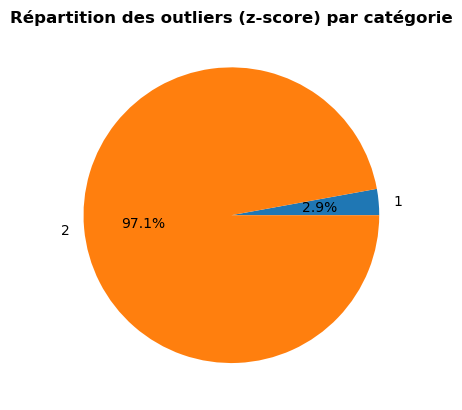

In [83]:
#répartition des catégories avec les produits dont le z_score > 3
repartition = z_values.groupby('categ').count()
repartition = repartition.reset_index()
plt.pie(x=repartition['client_id'], labels=repartition['categ'], autopct='%.1f%%')
plt.title('Répartition des outliers (z-score) par catégorie', fontweight='bold')

Text(0.5, 1.0, 'Répartition des outliers (z-score) par genre')

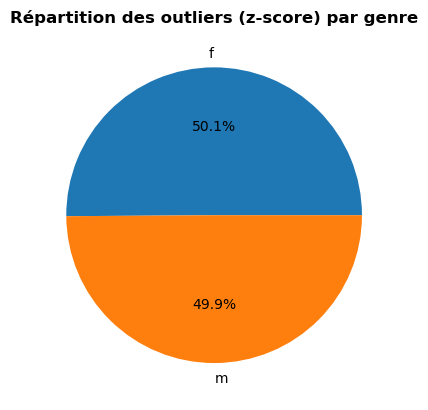

In [84]:
#répartition des genres avec les produits dont le z_score > 3
repartition = z_values.groupby('sex').agg({'client_id': 'nunique', 'birth': 'mean'})
repartition = repartition.reset_index()
plt.pie(x=repartition['client_id'], labels=repartition['sex'], autopct='%.1f%%')
plt.title('Répartition des outliers (z-score) par genre', fontweight='bold')

L'âge moyen d'un acheteur (toutes données) est de 46.2 ans contre un âge de 29.2 ans pour les outliers (avec le z-score).


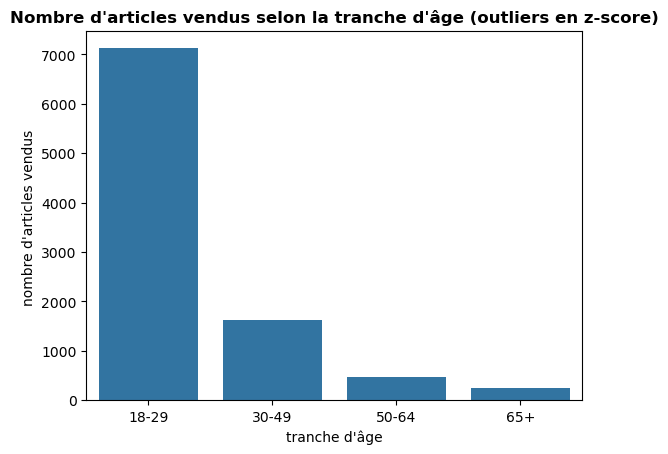

In [85]:
#répartition selon l'âge des outliers
sns.countplot(data=z_values, x='age_bin')
plt.title('Nombre d\'articles vendus selon la tranche d\'âge (outliers en z-score)', fontweight='bold')
plt.xlabel('tranche d\'âge')
plt.ylabel('nombre d\'articles vendus ')
print('L\'âge moyen d\'un acheteur (toutes données) est de {} ans contre un âge de {} ans pour les outliers (avec le z-score).'.format(round(data['age'].mean(),1), round (z_values['age'].mean(),1)))

Etape 4.2.2 - Identification par l'interval interquartile

In [86]:
#Utilisation de la fonction describe de Pandas pour l'etude des mesures de dispersions
data.describe()

,birth,price,age,z_score
count,687534.000000,687534.000000,687534.000000,6.875340e+05
mean,1977.817391,17.493918,46.182609,-2.439392e-16
std,13.607935,18.238337,13.607935,1.000001e+00
min,1929.000000,0.620000,20.000000,-9.251902e-01
25%,1970.000000,8.990000,37.000000,-4.662664e-01
50%,1980.000000,13.990000,44.000000,-1.921184e-01
75%,1987.000000,19.080000,54.000000,8.696427e-02
max,2004.000000,300.000000,95.000000,1.548970e+01


In [87]:
#Définissez un seuil pour les articles "outliers" en prix
#formule pour trouver outliers = Q3 + (1.5 * IQR) et Q1 – (1.5 * IQR)
upper_outlier = 19.08 + (1.5 * (19.08 - 8.99))
lower_outlier = 8.99 - (1.5 * (19.08 - 8.99))
#Quel est le seuil prix dont z-score est supérieur à 3?
ecart_inter = data.loc[data['price'] > upper_outlier,:].sort_values('price', ascending=True)
#prix seuil = 34.23 euros, 42800 valeurs
ecart_inter

,client_id,sex,birth,id_prod,date,session_id,price,categ,age,age_bin,z_score
590936,c_2493,f,1998,2_152,2022-11-16 23:44:07.778509,s_298585,34.23,2,26,18-29,0.917633
229010,c_3698,f,2003,2_152,2021-11-04 07:12:13.344702,s_114546,34.23,2,21,18-29,0.917633
467806,c_1516,f,2004,2_152,2022-07-07 13:20:31.359171,s_234964,34.23,2,20,18-29,0.917633
617785,c_3295,m,2004,2_152,2022-12-14 22:20:18.496265,s_312128,34.23,2,20,18-29,0.917633
467566,c_6605,f,2000,2_152,2022-07-07 07:41:39.766168,s_234846,34.23,2,24,18-29,0.917633
...,...,...,...,...,...,...,...,...,...,...,...
496152,c_4958,m,1999,2_2,2022-08-07 06:52:26.810576,s_249625,300.00,2,25,18-29,15.489696
602123,c_659,f,2001,2_2,2022-11-28 21:24:28.442508,s_304241,300.00,2,23,18-29,15.489696
345495,c_659,f,2001,2_2,2022-02-28 21:24:28.442508,s_172373,300.00,2,23,18-29,15.489696
6189,c_1001,m,1982,2_2,2021-03-07 14:07:31.004391,s_3041,300.00,2,42,30-49,15.489696


In [88]:
#caractérisation des outliers selon l'écart interquartile
for i in ecart_inter.columns:
    print ("---- %s ---" % i)
    print(ecart_inter[i].value_counts())
#essentiellement des catégories 2, 1 client à 3334 achats (sur 42800), plus d'hommes, plus de jeunes

---- client_id ---
client_id
c_4958    3334
c_6714     394
c_3454     141
c_1609     133
c_2899      61
          ... 
c_2601       1
c_2807       1
c_7359       1
c_2482       1
c_1001       1
Name: count, Length: 5059, dtype: int64
---- sex ---
sex
m    22247
f    20553
Name: count, dtype: int64
---- birth ---
birth
2004    6172
1999    5343
1996    2669
1992    2408
1995    2300
        ... 
1932       7
1930       6
1933       3
1931       3
1929       1
Name: count, Length: 76, dtype: int64
---- id_prod ---
id_prod
2_102     1027
2_135     1005
2_112      968
2_39       915
2_37       882
          ... 
0_1544       2
2_93         2
2_23         1
2_98         1
2_81         1
Name: count, Length: 433, dtype: int64
---- date ---
date
2022-11-16 23:44:07.778509    1
2021-06-02 00:48:07.999439    1
2022-06-29 13:56:35.129491    1
2021-09-10 20:51:33.784683    1
2021-11-13 17:25:08.629792    1
                             ..
2022-03-30 09:16:49.655408    1
2021-07-15 21:27:09.436390 

L'âge moyen d'un acheteur (toutes données) est de 46.2 ans contre un âge de 31.1 ans pour outliers (avec l'écart interquartile).


Text(0.5, 1.0, 'Répartition des outliers (écart interquartile) par catégorie')

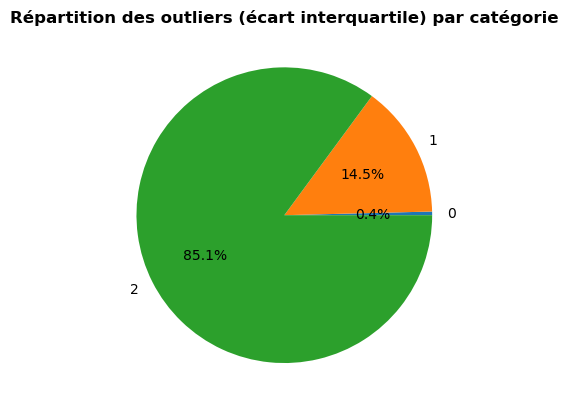

In [89]:
print('L\'âge moyen d\'un acheteur (toutes données) est de {} ans contre un âge de {} ans pour outliers (avec l\'écart interquartile).'.format(round(data['age'].mean(),1), round (ecart_inter['age'].mean(),1)))
#répartition des catégories avec les outliers selon l'écart interquartile
repartition = ecart_inter.groupby('categ').count()
repartition = repartition.reset_index()
plt.pie(x=repartition['client_id'], labels=repartition['categ'], autopct='%.1f%%')
plt.title('Répartition des outliers (écart interquartile) par catégorie', fontweight='bold')

Text(0.5, 1.0, 'Répartition des outliers (écart interquartile) par genre')

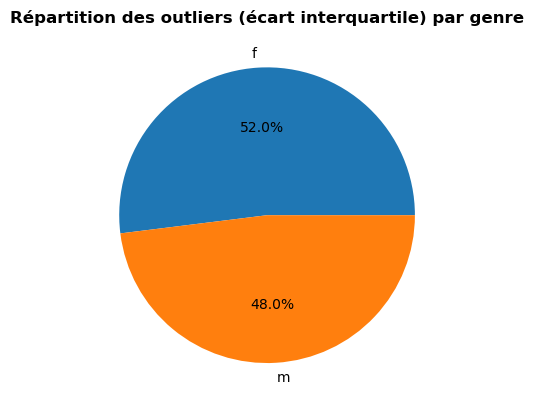

In [90]:
#répartition des genres avec les outliers selon l'écart interquartile
repartition = ecart_inter.groupby('sex')['client_id'].nunique()
repartition = repartition.reset_index()
plt.pie(x=repartition['client_id'], labels=repartition['sex'], autopct='%.1f%%')
plt.title('Répartition des outliers (écart interquartile) par genre', fontweight='bold')

**Etape 4.3 - Caractérisation de la variable 'categ'**

C:\Users\Djamel\AppData\Local\Temp\ipykernel_9520\569128588.py:2: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(data=data, x='categ', y='age', ci=None, estimator=np.mean, hue='sex')


Text(0, 0.5, "âge moyen de l'acheteur")

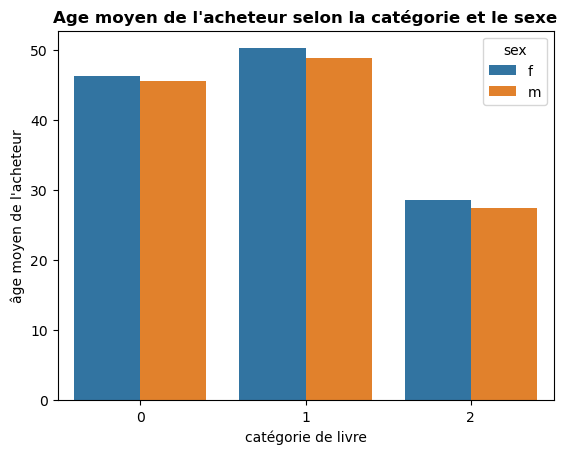

In [91]:
#creation d'une barplot avec l'âge moyen pour chaque catégorie et chaque sexe
sns.barplot(data=data, x='categ', y='age', ci=None, estimator=np.mean, hue='sex')
plt.title('Age moyen de l\'acheteur selon la catégorie et le sexe', fontweight='bold')
plt.xlabel('catégorie de livre')
plt.ylabel('âge moyen de l\'acheteur')

Text(0, 0.5, "nombre d'articles vendus ")

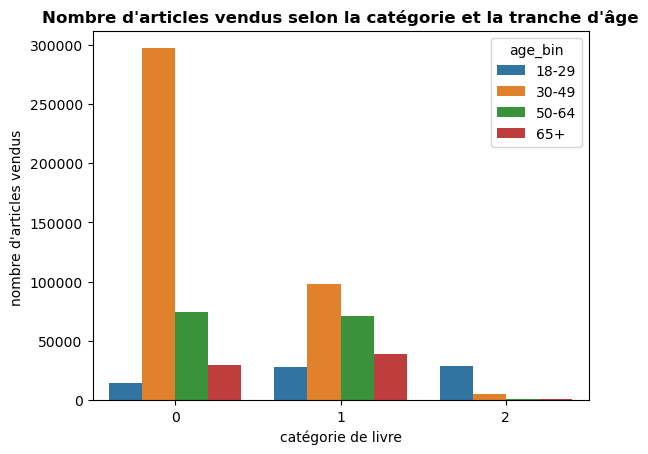

In [92]:
#creation d'une barplot avec le nombre d'articles vendus par tranche d'âge pour chaque catégorie
data = data.astype({'categ':'str'})
sns.countplot(data=data, x='categ', hue='age_bin')
plt.title('Nombre d\'articles vendus selon la catégorie et la tranche d\'âge', fontweight='bold')
plt.xlabel('catégorie de livre')
plt.ylabel('nombre d\'articles vendus ')

C:\Users\Djamel\AppData\Local\Temp\ipykernel_9520\1788954786.py:2: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(data=data, x='categ', y='price', ci=None, estimator=np.mean, hue='sex')


Text(0, 0.5, "prix d'achat moyen")

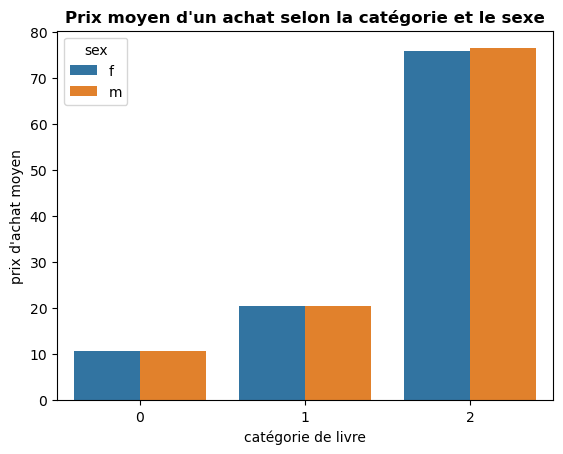

In [93]:
#creation d'une barplot avec l'âge moyen pour chaque catégorie et chaque sexe
sns.barplot(data=data, x='categ', y='price', ci=None, estimator=np.mean, hue='sex')
plt.title('Prix moyen d\'un achat selon la catégorie et le sexe', fontweight='bold')
plt.xlabel('catégorie de livre')
plt.ylabel('prix d\'achat moyen')

Text(0, 0.5, 'catégorie de livre')

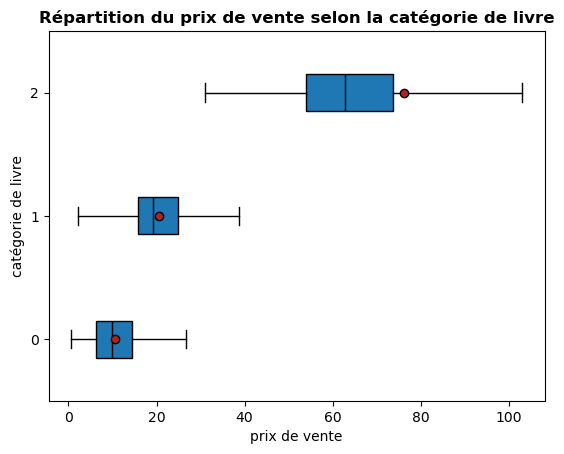

In [94]:
#répartition du prix par catégorie
X = "categ"
Y = "price"
modalites = data[X].unique()
groupes = []
for m in modalites:
    groupes.append(data[data[X]==m][Y])

medianprops = {'color':"black"}
meanprops = {'marker':'o', 'markeredgecolor':'black',
            'markerfacecolor':'firebrick'}

plt.boxplot(groupes, labels=modalites, showfliers=False, medianprops=medianprops,
            vert=False, patch_artist=True, showmeans=True, meanprops=meanprops)
plt.title('Répartition du prix de vente selon la catégorie de livre', fontweight='bold')
plt.xlabel('prix de vente')
plt.ylabel('catégorie de livre')

Text(0.5, 1.0, 'Répartition du CA total par volume')

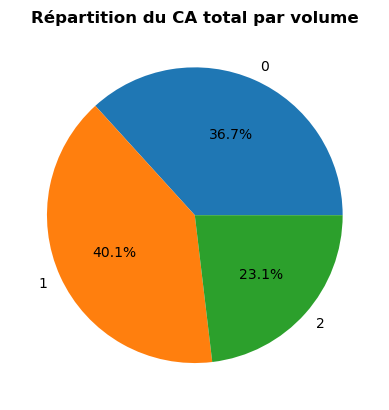

In [95]:
#répartition du CA total par catégorie
repartition = data.groupby('categ')['price'].sum()
repartition = repartition.reset_index()
plt.pie(x=repartition['price'], labels=repartition['categ'], autopct='%.1f%%')
plt.title('Répartition du CA total par volume', fontweight='bold')

Text(0.5, 1.0, 'Répartition du CA total par quantités vendues')

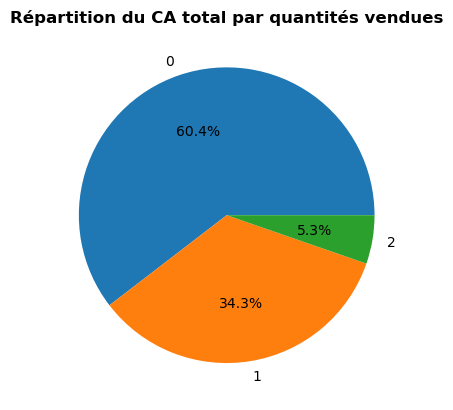

In [96]:
#répartition des quantités par catégorie
repartition = data.groupby('categ')['id_prod'].count()
repartition = repartition.reset_index()
plt.pie(x=repartition['id_prod'], labels=repartition['categ'], autopct='%.1f%%')
plt.title('Répartition du CA total par quantités vendues', fontweight='bold')

# **Etape 5 - Analyse de l'évolution dans le temps du CA, du nombre de produits vendus, du nombre de clients par mois, du nombre de transactions**

**5.1 - CA avec moyenne mobile**

In [97]:
print(data.dtypes)

client_id       object
sex             object
birth            int64
id_prod         object
date            object
session_id      object
price          float64
categ           object
age              int64
age_bin       category
z_score        float64
dtype: object


In [98]:
MA_moy['MA'] = round(MA_moy['price'].rolling(window=30).mean(), 0)

In [99]:
MA_moy['MA'] = round(MA_moy['MA'] / 1000, 1)

## Moyenne mobile exponentielle (EMA) 
### Contrairement à la moyenne mobile simple (SMA), l'EMA donne plus de poids aux valeurs récentes, ce qui la rend plus réactive aux changements récents dans les données. Vous pouvez utiliser la fonction ewm de pandas pour calculer l'EMA.

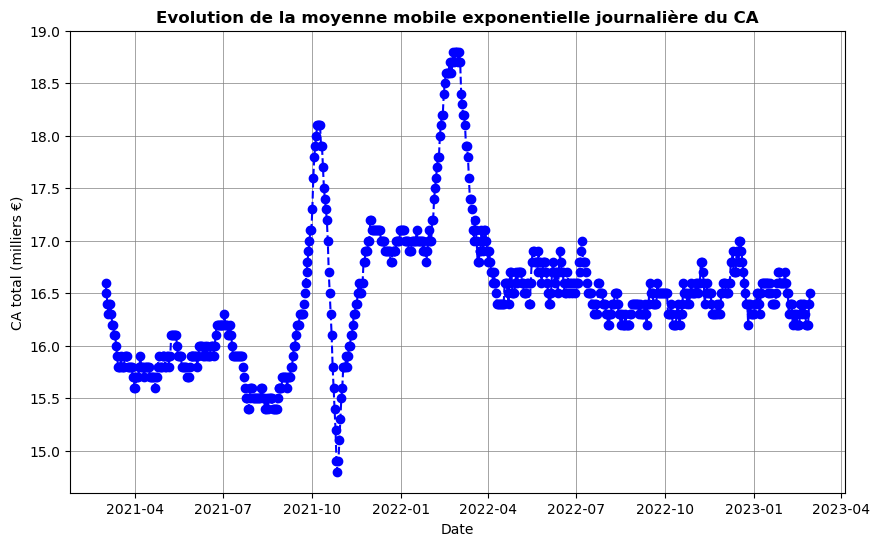

In [100]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Assurez-vous que la colonne 'date' est de type chaîne de caractères
data = data.astype({'date': 'str'})

# Créez une nouvelle colonne 'date_jour' en format datetime
data['date_jour'] = pd.to_datetime(data['date'].str.slice(0, 10), format='%Y-%m-%d')

# Filtrez les colonnes numériques
numeric_cols = data.select_dtypes(include=[np.number]).columns

# Création du sous-DataFrame 'moyenne mobile CA'
MA_moy = data.set_index('date_jour').groupby(pd.Grouper(freq='D'))[numeric_cols].sum()
MA_moy = MA_moy.drop(columns=['birth', 'age', 'z_score'])

# Calcul de la moyenne mobile exponentielle sur la colonne 'price'
MA_moy['EMA'] = MA_moy['price'].ewm(span=30, adjust=False).mean()
MA_moy['EMA'] = round(MA_moy['EMA'] / 1000, 1)
MA_moy = MA_moy.reset_index()

# Affichage dans un graphique de la moyenne mobile exponentielle du CA
plt.figure(figsize=(10, 6))
plt.plot(MA_moy['date_jour'], MA_moy['EMA'], marker='o', linestyle='--', color='blue')
plt.title('Evolution de la moyenne mobile exponentielle journalière du CA', fontweight='bold')
plt.xlabel('Date')
plt.ylabel('CA total (milliers €)')
plt.grid(color='gray', linestyle='-', linewidth=0.5)
plt.show()

## Lissage exponentiel : 
### Cette méthode est similaire à l'EMA mais utilise un facteur de lissage différent. Vous pouvez utiliser la fonction exponential_smoothing de statsmodels pour appliquer ce lissage.

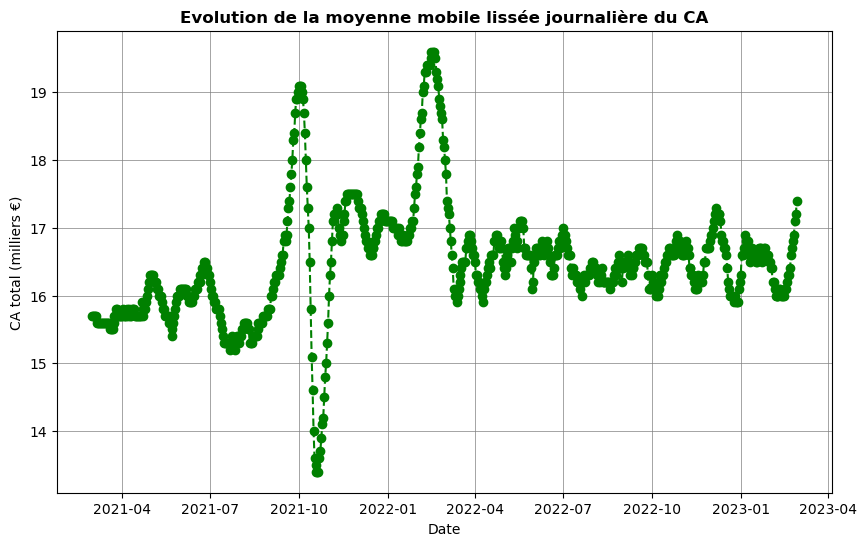

In [101]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import savgol_filter

# Assurez-vous que la colonne 'date' est de type chaîne de caractères
data = data.astype({'date': 'str'})

# Créez une nouvelle colonne 'date_jour' en format datetime
data['date_jour'] = pd.to_datetime(data['date'].str.slice(0, 10), format='%Y-%m-%d')

# Filtrez les colonnes numériques
numeric_cols = data.select_dtypes(include=[np.number]).columns

# Création du sous-DataFrame 'moyenne mobile CA'
MA_moy = data.set_index('date_jour').groupby(pd.Grouper(freq='D'))[numeric_cols].sum()
MA_moy = MA_moy.drop(columns=['birth', 'age', 'z_score'])

# Appliquer le filtre de Savitzky-Golay sur la colonne 'price'
MA_moy['SG'] = savgol_filter(MA_moy['price'], window_length=31, polyorder=2)
MA_moy['SG'] = round(MA_moy['SG'] / 1000, 1)
MA_moy = MA_moy.reset_index()

# Affichage dans un graphique de la moyenne mobile lissée du CA
plt.figure(figsize=(10, 6))
plt.plot(MA_moy['date_jour'], MA_moy['SG'], marker='o', linestyle='--', color='green')
plt.title('Evolution de la moyenne mobile lissée journalière du CA', fontweight='bold')
plt.xlabel('Date')
plt.ylabel('CA total (milliers €)')
plt.grid(color='gray', linestyle='-', linewidth=0.5)
plt.show()

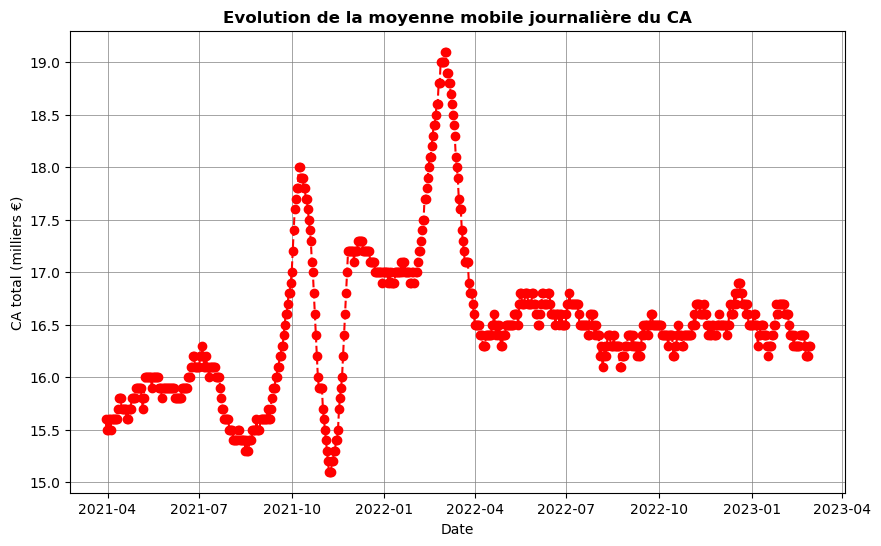

In [102]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Assurez-vous que la colonne 'date' est de type chaîne de caractères
data = data.astype({'date': 'str'})

# Créez une nouvelle colonne 'date_jour' en format datetime
data['date_jour'] = pd.to_datetime(data['date'].str.slice(0, 10), format='%Y-%m-%d')

# Filtrez les colonnes numériques
numeric_cols = data.select_dtypes(include=[np.number]).columns

# Création du sous-DataFrame 'moyenne mobile CA'
MA_moy = data.set_index('date_jour').groupby(pd.Grouper(freq='D'))[numeric_cols].sum()
MA_moy = MA_moy.drop(columns=['birth', 'age', 'z_score'])

# Calcul de la moyenne mobile sur la colonne 'price'
MA_moy['MA'] = round(MA_moy['price'].rolling(window=30).mean(), 0)
MA_moy['MA'] = round(MA_moy['MA'] / 1000, 1)
MA_moy = MA_moy.reset_index()

# Affichage dans un graphique de la moyenne mobile mensuelle du CA
plt.figure(figsize=(10, 6))
plt.plot(MA_moy['date_jour'], MA_moy['MA'], marker='o', linestyle='--', color='red')
plt.title('Evolution de la moyenne mobile journalière du CA', fontweight='bold')
plt.xlabel('Date')
plt.ylabel('CA total (milliers €)')
plt.grid(color='gray', linestyle='-', linewidth=0.5)
plt.show()

## calculer et afficher la moyenne mobile sur une série de temps mensuelle :


C:\Users\Djamel\AppData\Local\Temp\ipykernel_9520\903143719.py:15: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  MA_moy = data.set_index('date_mois').groupby(pd.Grouper(freq='M'))[numeric_cols].sum()


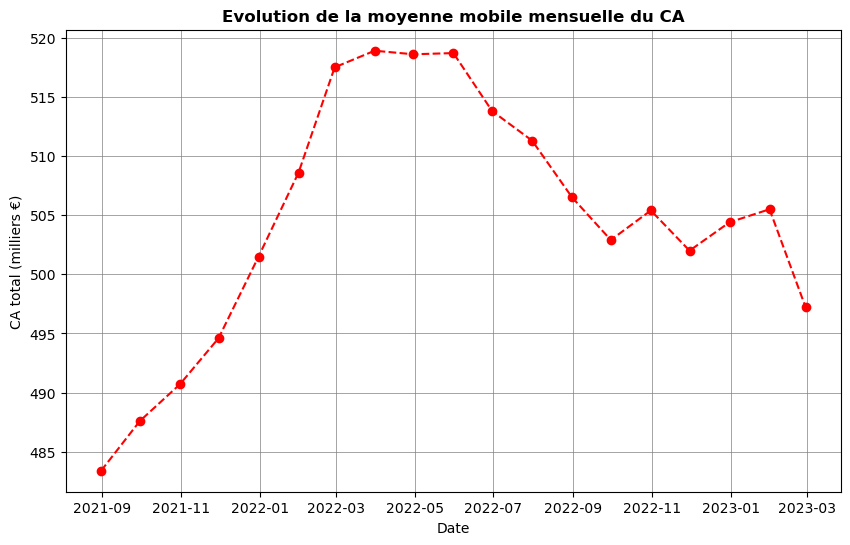

In [103]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Assurez-vous que la colonne 'date' est de type chaîne de caractères
data = data.astype({'date': 'str'})

# Créez une nouvelle colonne 'date_mois' en format datetime
data['date_mois'] = pd.to_datetime(data['date'].str.slice(0, 7), format='%Y-%m')

# Filtrez les colonnes numériques
numeric_cols = data.select_dtypes(include=[np.number]).columns

# Création du sous-DataFrame 'moyenne mobile CA'
MA_moy = data.set_index('date_mois').groupby(pd.Grouper(freq='M'))[numeric_cols].sum()
MA_moy = MA_moy.drop(columns=['birth', 'age', 'z_score'])

# Calcul de la moyenne mobile sur la colonne 'price'
MA_moy['MA'] = round(MA_moy['price'].rolling(window=6).mean(), 0)
MA_moy['MA'] = round(MA_moy['MA'] / 1000, 1)
MA_moy = MA_moy.reset_index()

# Affichage dans un graphique de la moyenne mobile mensuelle du CA
plt.figure(figsize=(10, 6))
plt.plot(MA_moy['date_mois'], MA_moy['MA'], marker='o', linestyle='--', color='red')
plt.title('Evolution de la moyenne mobile mensuelle du CA', fontweight='bold')
plt.xlabel('Date')
plt.ylabel('CA total (milliers €)')
plt.grid(color='gray', linestyle='-', linewidth=0.5)
plt.show()

## Ce code applique la méthode de lissage exponentiel sur la colonne 'price' et affiche la moyenne mobile lissée exponentiellement mensuelle du CA total 

C:\Users\Djamel\AppData\Local\Temp\ipykernel_9520\2194991053.py:16: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  MA_moy = data.set_index('date_mois').groupby(pd.Grouper(freq='M'))[numeric_cols].sum()


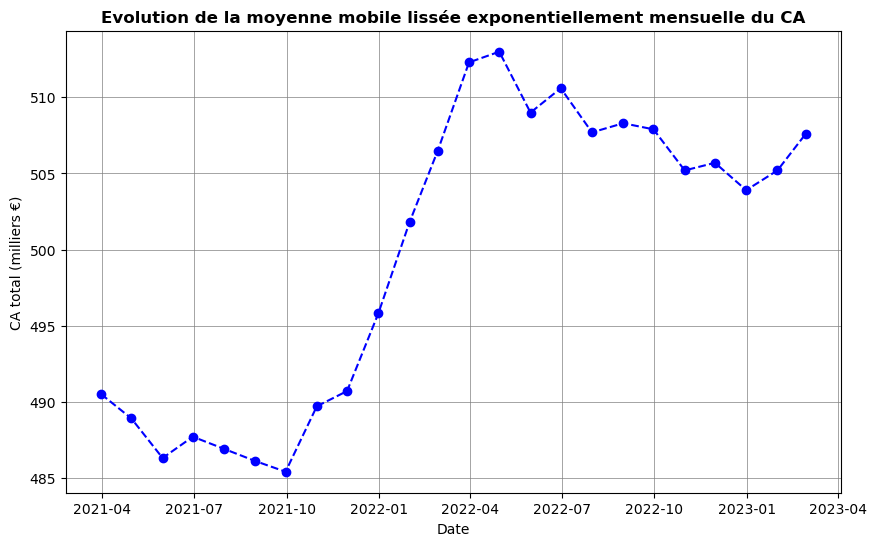

In [104]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.holtwinters import ExponentialSmoothing

# Assurez-vous que la colonne 'date' est de type chaîne de caractères
data = data.astype({'date': 'str'})

# Créez une nouvelle colonne 'date_mois' en format datetime
data['date_mois'] = pd.to_datetime(data['date'].str.slice(0, 7), format='%Y-%m')

# Filtrez les colonnes numériques
numeric_cols = data.select_dtypes(include=[np.number]).columns

# Création du sous-DataFrame 'moyenne mobile CA'
MA_moy = data.set_index('date_mois').groupby(pd.Grouper(freq='M'))[numeric_cols].sum()
MA_moy = MA_moy.drop(columns=['birth', 'age', 'z_score'])

# Appliquer le lissage exponentiel sur la colonne 'price'
model = ExponentialSmoothing(MA_moy['price'], trend=None, seasonal=None, seasonal_periods=None)
fit = model.fit(smoothing_level=0.2)
MA_moy['ES'] = round(fit.fittedvalues / 1000, 1)
MA_moy = MA_moy.reset_index()

# Affichage dans un graphique de la moyenne mobile lissée exponentiellement du CA
plt.figure(figsize=(10, 6))
plt.plot(MA_moy['date_mois'], MA_moy['ES'], marker='o', linestyle='--', color='blue')
plt.title('Evolution de la moyenne mobile lissée exponentiellement mensuelle du CA', fontweight='bold')
plt.xlabel('Date')
plt.ylabel('CA total (milliers €)')
plt.grid(color='gray', linestyle='-', linewidth=0.5)
plt.show()

**5.2 - CA par catégorie**

In [105]:
import pandas as pd

# Assurez-vous que la colonne 'date' est de type chaîne de caractères
data = data.astype({'date': 'str'})

# Créez une nouvelle colonne 'date_jour' en format datetime
data['date_jour'] = pd.to_datetime(data['date'].str.slice(0, 10), format='%Y-%m-%d')

# Création d'un DataFrame avec le CA par catégorie
data_CA_cat = data.set_index('date_jour').pivot_table(index=pd.Grouper(freq='M'), columns='categ', values='price', aggfunc='sum')
data_CA_cat = data_CA_cat.reset_index()

# Affichage du DataFrame
print(data_CA_cat)

C:\Users\Djamel\AppData\Local\Temp\ipykernel_9520\3803872243.py:10: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  data_CA_cat = data.set_index('date_jour').pivot_table(index=pd.Grouper(freq='M'), columns='categ', values='price', aggfunc='sum')


categ  date_jour          0          1          2
0     2021-03-31  193629.17  186974.17  101837.27
1     2021-04-30  205222.46  156138.35  114748.49
2     2021-05-31  196186.72  165893.40  130863.35
3     2021-06-30  167943.15  189162.04  126983.37
4     2021-07-31  144750.79  188523.27  149561.34
5     2021-08-31  167737.62  162991.38  151555.79
6     2021-09-30  246353.91  190613.78   70272.99
7     2021-10-31  199250.83  207696.74   87785.59
8     2021-11-30  155909.56  252910.39  107347.78
9     2021-12-31  206036.24  251026.75   68854.29
10    2022-01-31  164210.51  256267.92  104860.56
11    2022-02-28  183197.33  213120.64  139253.53
12    2022-03-31  191464.94  206485.26  117506.33
13    2022-04-30  174997.26  195263.97  122737.71
14    2022-05-31  194872.34  205532.63  116727.63
15    2022-06-30  183934.86  201912.06  110169.20
16    2022-07-31  187097.00  193969.72  129716.40
17    2022-08-31  177372.76  211360.09  117734.42
18    2022-09-30  183329.24  195379.54  115405.75


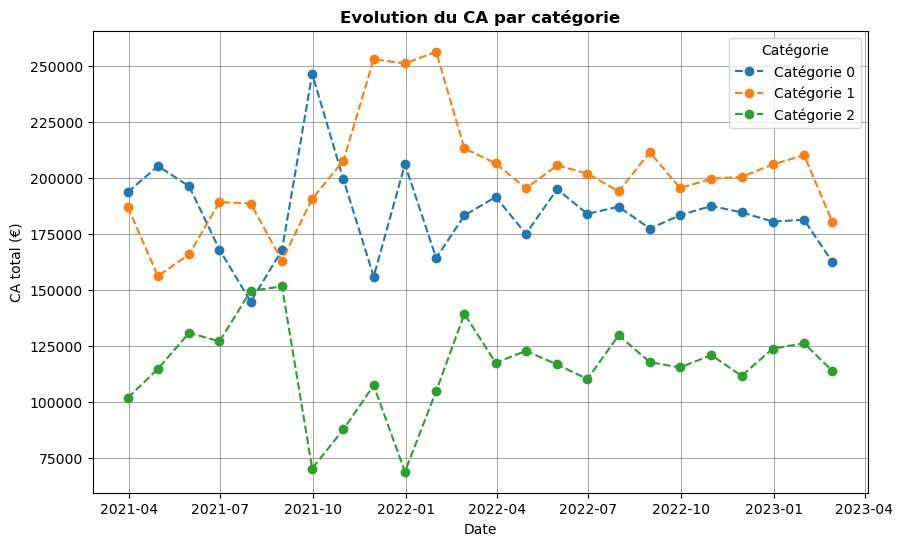

In [106]:
# Affichage dans un graphique de l'évolution du CA par catégorie
plt.figure(figsize=(10, 6))

# Boucle pour tracer chaque catégorie
for cat in data_CA_cat.columns[1:]:
    plt.plot(data_CA_cat['date_jour'], data_CA_cat[cat], label=f'Catégorie {cat}', marker='o', linestyle='--')

plt.legend(loc='upper right', title='Catégorie')
plt.title('Evolution du CA par catégorie', fontweight='bold')
plt.xlabel('Date')
plt.ylabel('CA total (€)')
plt.grid(color='gray', linestyle='-', linewidth=0.5)
plt.show()

In [107]:
#dans correction : catégorie presque nul (chute) sur categ 1... vérifions.
octobre = data.loc[(data['date_jour'] < '2021-11-01') & (data['date_jour'] > '2021-09-30'),:]
octobre.groupby('categ')['price'].sum()

categ
0    199250.83
1    207696.74
2     87785.59
Name: price, dtype: float64

**5.3 - Nombre de clients par mois**

In [108]:
import pandas as pd

# Conversion de la colonne 'date' en type datetime
data['date'] = pd.to_datetime(data['date'])

# Création d'un DataFrame avec le nombre de clients uniques par mois
clients_uniques_mois = data.set_index('date').groupby(pd.Grouper(freq='ME'))['client_id'].nunique()
clients_uniques_mois = clients_uniques_mois.reset_index()

# Renommer les colonnes pour plus de clarté
clients_uniques_mois = clients_uniques_mois.rename(columns={'date': 'mois', 'client_id': 'nombre_clients_uniques'})

print(clients_uniques_mois)

         mois  nombre_clients_uniques
0  2021-03-31                    5676
1  2021-04-30                    5674
2  2021-05-31                    5644
3  2021-06-30                    5659
4  2021-07-31                    5672
5  2021-08-31                    5642
6  2021-09-30                    5693
7  2021-10-31                    6190
8  2021-11-30                    5875
9  2021-12-31                    5867
10 2022-01-31                    5809
11 2022-02-28                    5729
12 2022-03-31                    5835
13 2022-04-30                    5695
14 2022-05-31                    5843
15 2022-06-30                    5717
16 2022-07-31                    5778
17 2022-08-31                    5805
18 2022-09-30                    5738
19 2022-10-31                    5755
20 2022-11-30                    5749
21 2022-12-31                    5765
22 2023-01-31                    5828
23 2023-02-28                    5587


In [109]:
print (data.columns)

Index(['client_id', 'sex', 'birth', 'id_prod', 'date', 'session_id', 'price',
       'categ', 'age', 'age_bin', 'z_score', 'date_jour', 'date_mois'],
      dtype='object')


In [110]:
import pandas as pd

# Conversion de la colonne 'date' en type datetime
data['date'] = pd.to_datetime(data['date'])

# Calcul du chiffre d'affaires quotidien
chiffre_affaires_jour = data.groupby('date')['price'].sum().reset_index()

# Calcul de la moyenne mobile (par exemple, sur 7 jours)
chiffre_affaires_jour['moyenne_mobile'] = chiffre_affaires_jour['price'].rolling(window=7).mean()

print(chiffre_affaires_jour)

                             date  price  moyenne_mobile
0      2021-03-01 00:01:07.843138  11.99             NaN
1      2021-03-01 00:02:26.047414  19.37             NaN
2      2021-03-01 00:02:38.311413   4.50             NaN
3      2021-03-01 00:04:54.559692   6.55             NaN
4      2021-03-01 00:05:18.801198  16.49             NaN
...                           ...    ...             ...
687410 2023-02-28 23:49:03.148402  21.92       17.404286
687411 2023-02-28 23:51:29.318531  48.99       22.404286
687412 2023-02-28 23:53:18.929676  26.99       24.547143
687413 2023-02-28 23:58:00.107815   8.99       22.832857
687414 2023-02-28 23:58:30.792755   4.52       21.337143

[687415 rows x 3 columns]


In [111]:
# Calcul du chiffre d'affaires par catégorie
chiffre_affaires_categorie = data.groupby('categ')['price'].sum().reset_index()

print(chiffre_affaires_categorie)

  categ       price
0     0  4419730.97
1     1  4827657.11
2     2  2780275.02


In [112]:
# Nombre de produits vendus
nombre_produits_vendus = data.shape[0]

print(f"Nombre de produits vendus : {nombre_produits_vendus}")

Nombre de produits vendus : 687534


In [113]:
import pandas as pd

# Conversion de la colonne 'date' en type datetime
data['date'] = pd.to_datetime(data['date'])

# Calcul du chiffre d'affaires quotidien
data['chiffre_affaires'] = data['price']
chiffre_affaires_jour = data.groupby('date')['price'].sum().reset_index()

# Calcul de la moyenne mobile (par exemple, sur 7 jours)
chiffre_affaires_jour['moyenne_mobile'] = chiffre_affaires_jour['price'].rolling(window=7).mean()

# Calcul du chiffre d'affaires par catégorie
chiffre_affaires_categorie = data.groupby('categ')['price'].sum().reset_index()

# Nombre de clients uniques par mois
clients_uniques_mois = data.set_index('date').groupby(pd.Grouper(freq='M'))['client_id'].nunique().reset_index()
clients_uniques_mois = clients_uniques_mois.rename(columns={'date': 'mois', 'client_id': 'nombre_clients_uniques'})

# Nombre de transactions
nombre_transactions = data.shape[0]

# Nombre de produits vendus
nombre_produits_vendus = data.shape[0]

# Création du tableau récapitulatif
recapitulatif = {
    'Chiffre d\'affaires total': [data['price'].sum()],
    'Nombre de clients uniques par mois': [clients_uniques_mois['nombre_clients_uniques'].sum()],
    'Nombre de transactions': [nombre_transactions],
    'Nombre de produits vendus': [nombre_produits_vendus]
}

recapitulatif_df = pd.DataFrame(recapitulatif)

print(recapitulatif_df)

C:\Users\Djamel\AppData\Local\Temp\ipykernel_9520\508346451.py:17: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  clients_uniques_mois = data.set_index('date').groupby(pd.Grouper(freq='M'))['client_id'].nunique().reset_index()


   Chiffre d'affaires total  Nombre de clients uniques par mois  \
0                12027663.1                              138225   

   Nombre de transactions  Nombre de produits vendus  
0                  687534                     687534  


C:\Users\Djamel\AppData\Local\Temp\ipykernel_9520\1882175268.py:15: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  clients_uniques_mois = data.set_index('date_mois').groupby(pd.Grouper(freq='M'))['client_id'].nunique().reset_index()


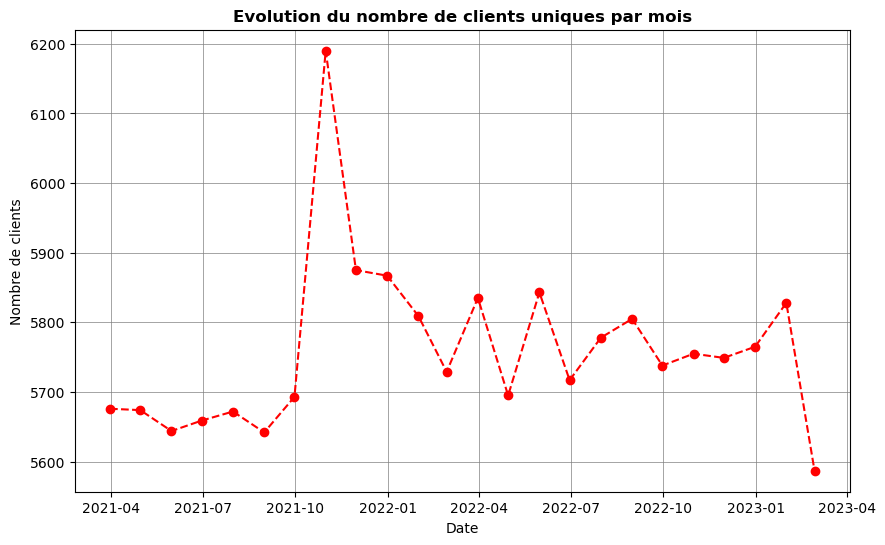

In [117]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Assurez-vous que la colonne 'date' est de type chaîne de caractères
data = data.astype({'date': 'str'})

# Créez une nouvelle colonne 'date_mois' en format datetime
data['date_mois'] = pd.to_datetime(data['date'].str.slice(0, 7), format='%Y-%m')

# Filtrez les colonnes numériques
numeric_cols = data.select_dtypes(include=[np.number]).columns

# Création du sous-DataFrame 'clients_uniques_mois'
clients_uniques_mois = data.set_index('date_mois').groupby(pd.Grouper(freq='M'))['client_id'].nunique().reset_index()

# Affichage dans un graphique de l'évolution du nombre de clients par mois
plt.figure(figsize=(10, 6))
plt.plot(clients_uniques_mois['date_mois'], clients_uniques_mois['client_id'], marker='o', linestyle='--', color='red')
plt.title('Evolution du nombre de clients uniques par mois', fontweight='bold')
plt.xlabel('Date')
plt.ylabel('Nombre de clients')
plt.grid(color='gray', linestyle='-', linewidth=0.5)
plt.show()

**5.4 - Nombre de produits vendus**

In [122]:
#création d'un dataframe avec nombre de produits vendus par mois
produits_vendus = data.set_index('date_jour').groupby(pd.Grouper(freq='M'))['id_prod'].count()
produits_vendus = produits_vendus.reset_index()

C:\Users\Djamel\AppData\Local\Temp\ipykernel_9520\3506044356.py:2: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  produits_vendus = data.set_index('date_jour').groupby(pd.Grouper(freq='M'))['id_prod'].count()


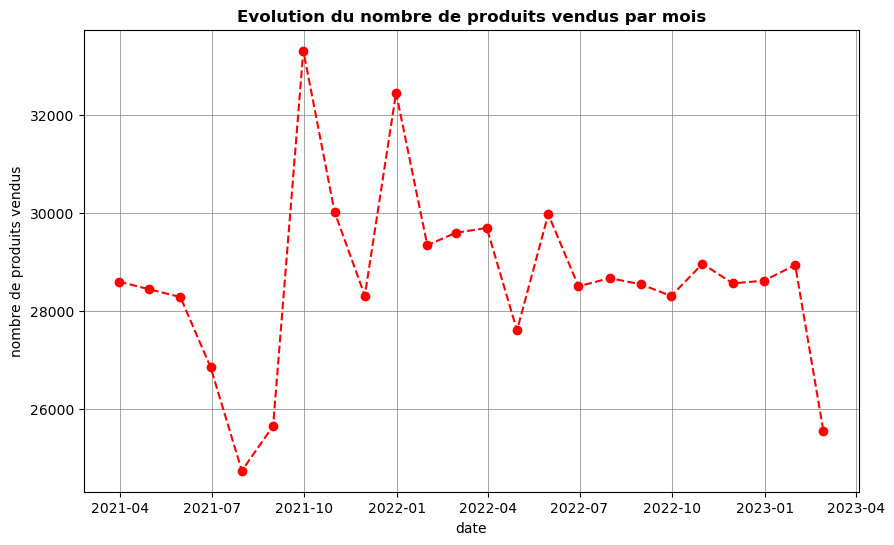

In [123]:
#Affichage dans un graphique de l'évolution du nombre de produits vendus par mois
plt.figure(figsize=(10,6))
plt.plot(produits_vendus['date_jour'], produits_vendus['id_prod'], marker='o', linestyle='--', color='red')
plt.title('Evolution du nombre de produits vendus par mois', fontweight='bold')
plt.xlabel('date')
plt.ylabel('nombre de produits vendus')
plt.grid(color='gray', linestyle='-', linewidth=0.5)

**5.5 - Nombre de transactions**

In [124]:
#création d'un dataframe avec nombre de transactions par mois
transactions_mois = data.set_index('date_jour').groupby(pd.Grouper(freq='M'))['session_id'].nunique()
transactions_mois = transactions_mois.reset_index()

C:\Users\Djamel\AppData\Local\Temp\ipykernel_9520\1384102626.py:2: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  transactions_mois = data.set_index('date_jour').groupby(pd.Grouper(freq='M'))['session_id'].nunique()


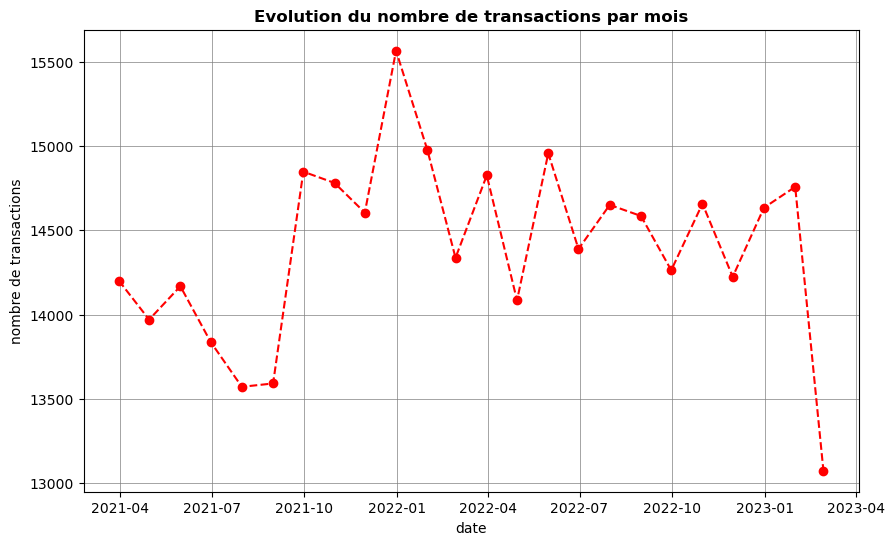

In [125]:
#Affichage dans un graphique de l'évolution du nombre de transactions par mois
plt.figure(figsize=(10,6))
plt.plot(transactions_mois['date_jour'], transactions_mois['session_id'], marker='o', linestyle='--', color='red')
plt.title('Evolution du nombre de transactions par mois', fontweight='bold')
plt.xlabel('date')
plt.ylabel('nombre de transactions')
plt.grid(color='gray', linestyle='-', linewidth=0.5)

# **Etape 6 - Analyse des tops, des flops**

**6.1 - Analyse des tops**

(25000.0, 100000.0)

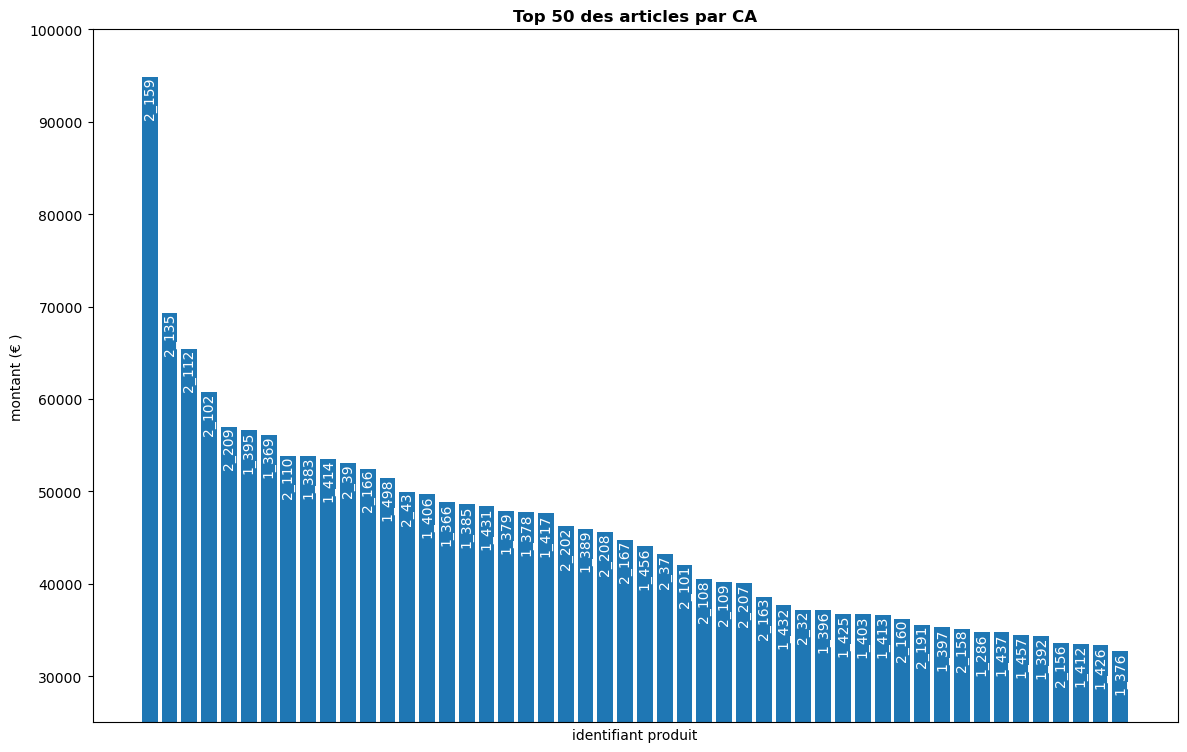

In [126]:
#créer un df avec le CA par produit
data = data.astype({'categ':'int'})
top_produits = data.groupby('id_prod').agg(CA=('price', 'sum'), prix=('price', 'mean'), age=('age', 'mean'), categ=('categ', 'mean'))
top_produits = top_produits.reset_index()
top_produits = top_produits.sort_values('CA', ascending=False).reset_index(drop=True)
#Afficher les 50 premiers articles en CA
top_50_CA = top_produits.sort_values('CA', ascending=False).iloc[:50,:].reset_index(drop=True)
#Graphique en barre des 50 premiers articles avec plotly express
plt.figure(figsize=(14,9))
plt.bar(height=top_50_CA['CA'], x=top_50_CA['id_prod'])
plt.title('Top 50 des articles par CA', fontweight='bold')
plt.xlabel('identifiant produit')
plt.xticks([])
plt.ylabel('montant (€ )')
for index, value in enumerate(top_50_CA['CA']):
    plt.text(index, value, str(top_50_CA['id_prod'][index]), ha='center', va='top', rotation='vertical', color='white')
plt.ylim([25000, 100000])

Text(0.5, 1.0, 'Répartition des articles du top 50 CA par catégorie')

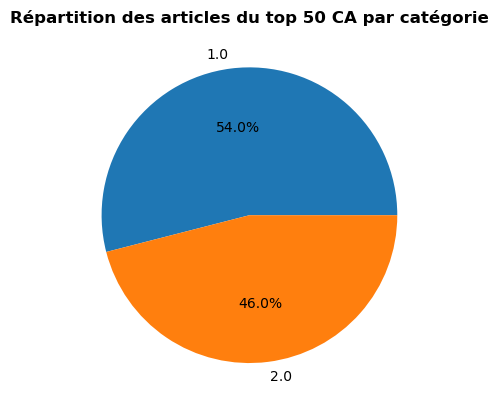

In [127]:
#répartition par catégorie du top 50 CA
top_50_CA = top_50_CA.astype({'categ':'str'})
repartition = top_50_CA.groupby('categ').count()
repartition = repartition.reset_index()
plt.pie(x=repartition['id_prod'], labels=repartition['categ'], autopct='%.1f%%')
plt.title('Répartition des articles du top 50 CA par catégorie', fontweight='bold')

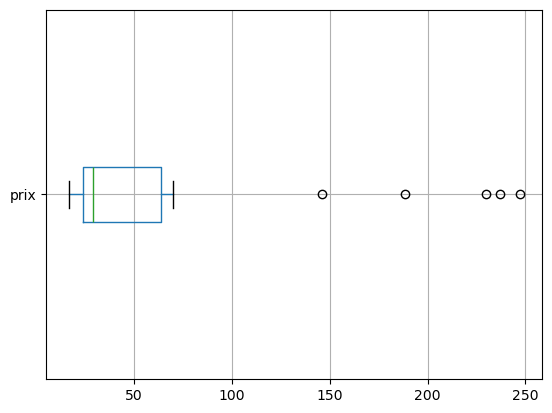

In [128]:
#répartition du prix des articles du top 50 CA
top_50_CA.boxplot(column="prix", vert=False)
plt.show()

(1200.0, 2400.0)

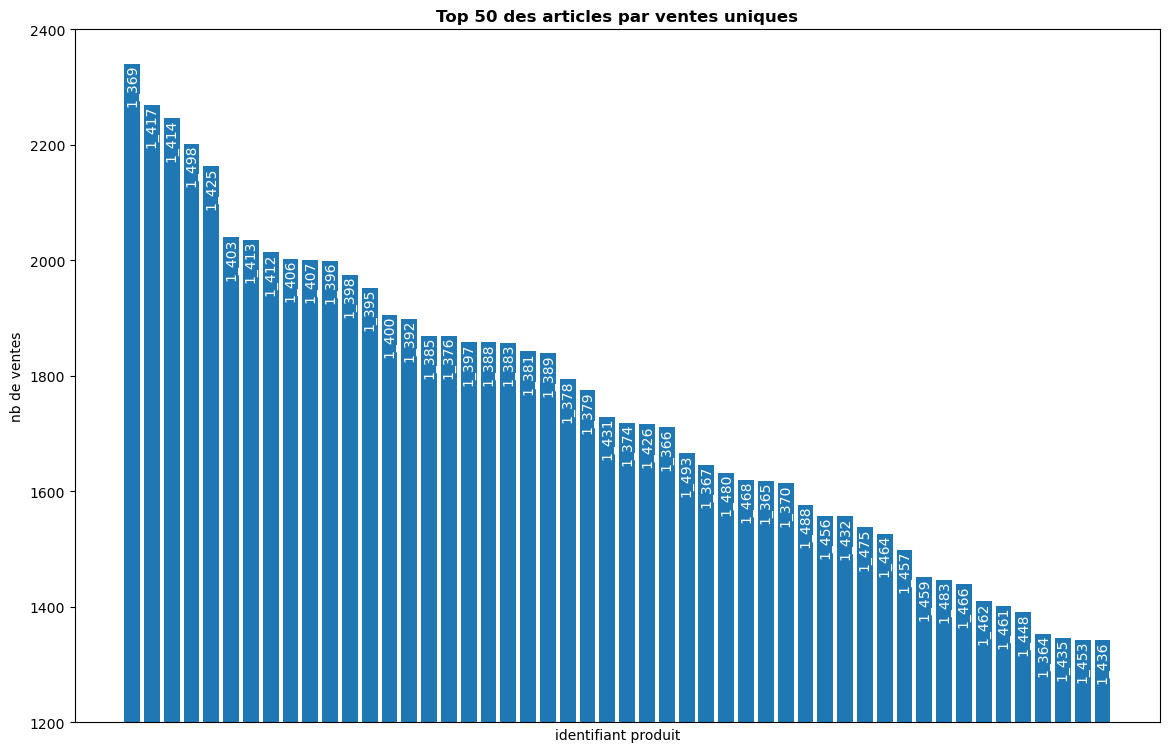

In [129]:
#créer un df avec les quantités par produit
top_produits = data.groupby('id_prod').agg(ventes=('id_prod', 'count'), prix=('price', 'mean'), age=('age', 'mean'), categ=('categ', 'mean'))
top_produits = top_produits.reset_index()
top_produits = top_produits.sort_values('ventes', ascending=False).reset_index(drop=True)
#Afficher les 50 premiers articles en quantités
top_50_qte = top_produits.sort_values('ventes', ascending=False).iloc[:50,:].reset_index(drop=True)
#Graphique en barre des 50 premiers articles avec plotly express
plt.figure(figsize=(14,9))
plt.bar(height=top_50_qte['ventes'], x=top_50_qte['id_prod'])
plt.title('Top 50 des articles par ventes uniques', fontweight='bold')
plt.xlabel('identifiant produit')
plt.xticks([])
plt.ylabel('nb de ventes')
for index, value in enumerate(top_50_qte['ventes']):
    plt.text(index, value, str(top_50_qte['id_prod'][index]), ha='center', va='top', rotation='vertical', color='white')
plt.ylim([1200, 2400])

Text(0.5, 1.0, 'Répartition des articles du top 50 quantité par catégorie')

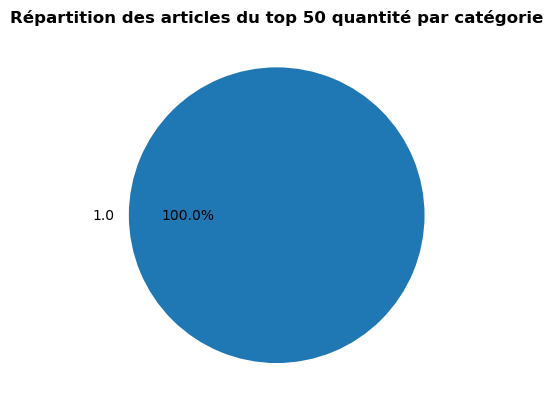

In [130]:
#répartition par catégorie du top 50 quantité
top_50_qte = top_50_qte.astype({'categ':'str'})
repartition = top_50_qte.groupby('categ').count()
repartition = repartition.reset_index()
plt.pie(x=repartition['id_prod'], labels=repartition['categ'], autopct='%.1f%%')
plt.title('Répartition des articles du top 50 quantité par catégorie', fontweight='bold')

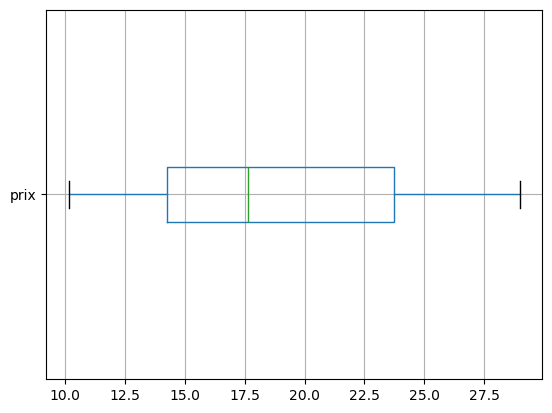

In [131]:
#répartition du prix des articles du top 50 quantité
top_50_qte.boxplot(column="prix", vert=False)
plt.show()

**6.2 - Analyse des flops**

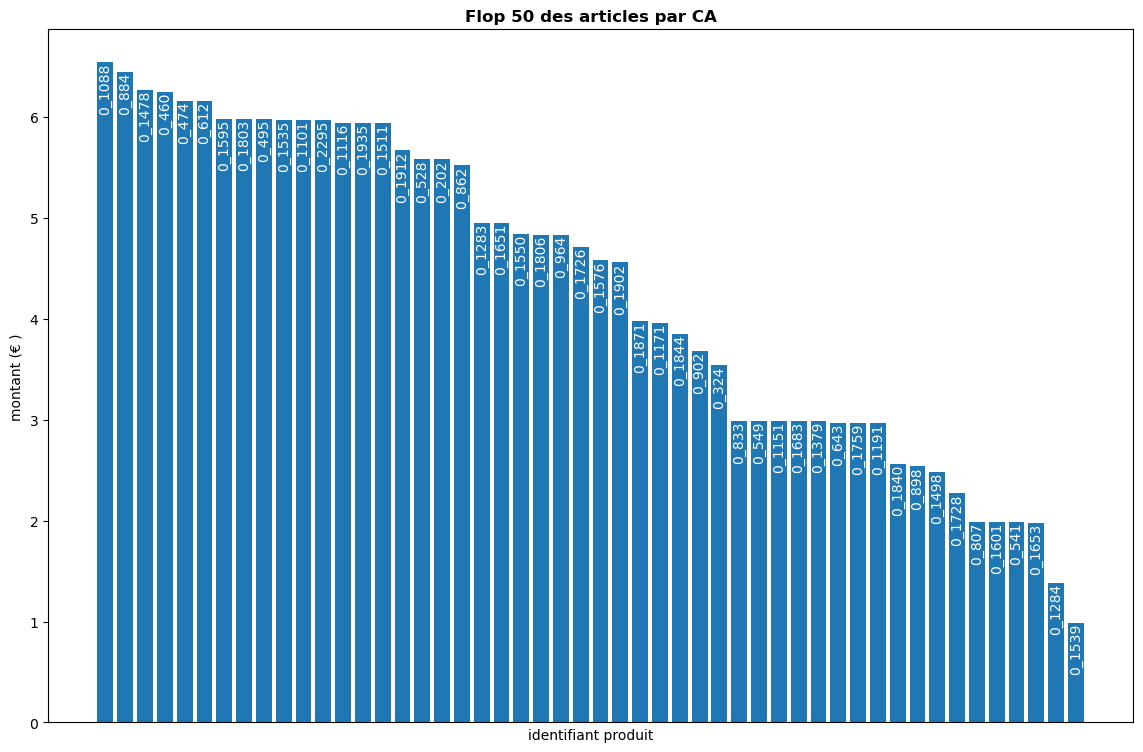

In [132]:
#créer un df avec le CA par produit
data = data.astype({'categ':'int'})
top_produits = data.groupby('id_prod').agg(CA=('price', 'sum'), prix=('price', 'mean'), age=('age', 'mean'), categ=('categ', 'mean'))
top_produits = top_produits.reset_index()
top_produits = top_produits.sort_values('CA', ascending=False).reset_index(drop=True)
#Afficher les 50 derniers articles en CA
flop_50_CA = top_produits.sort_values('CA', ascending=False).iloc[-50:,:].reset_index(drop=True)
#Graphique en barre des 50 premiers articles avec plotly express
plt.figure(figsize=(14,9))
plt.bar(height=flop_50_CA['CA'], x=flop_50_CA['id_prod'])
plt.title('Flop 50 des articles par CA', fontweight='bold')
plt.xlabel('identifiant produit')
plt.xticks([])
plt.ylabel('montant (€ )')
for index, value in enumerate(flop_50_CA['CA']):
    plt.text(index, value, str(flop_50_CA['id_prod'][index]), ha='center', va='top', rotation='vertical', color='white')

Text(0.5, 1.0, 'Répartition des articles du flop 50 CA par catégorie')

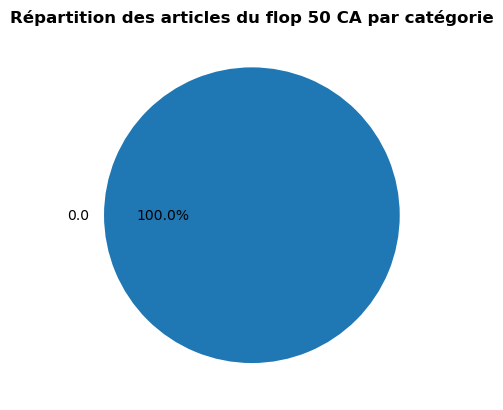

In [133]:
#répartition par catégorie du flop 50 CA
flop_50_CA = flop_50_CA.astype({'categ':'str'})
repartition = flop_50_CA.groupby('categ').count()
repartition = repartition.reset_index()
plt.pie(x=repartition['id_prod'], labels=repartition['categ'], autopct='%.1f%%')
plt.title('Répartition des articles du flop 50 CA par catégorie', fontweight='bold')

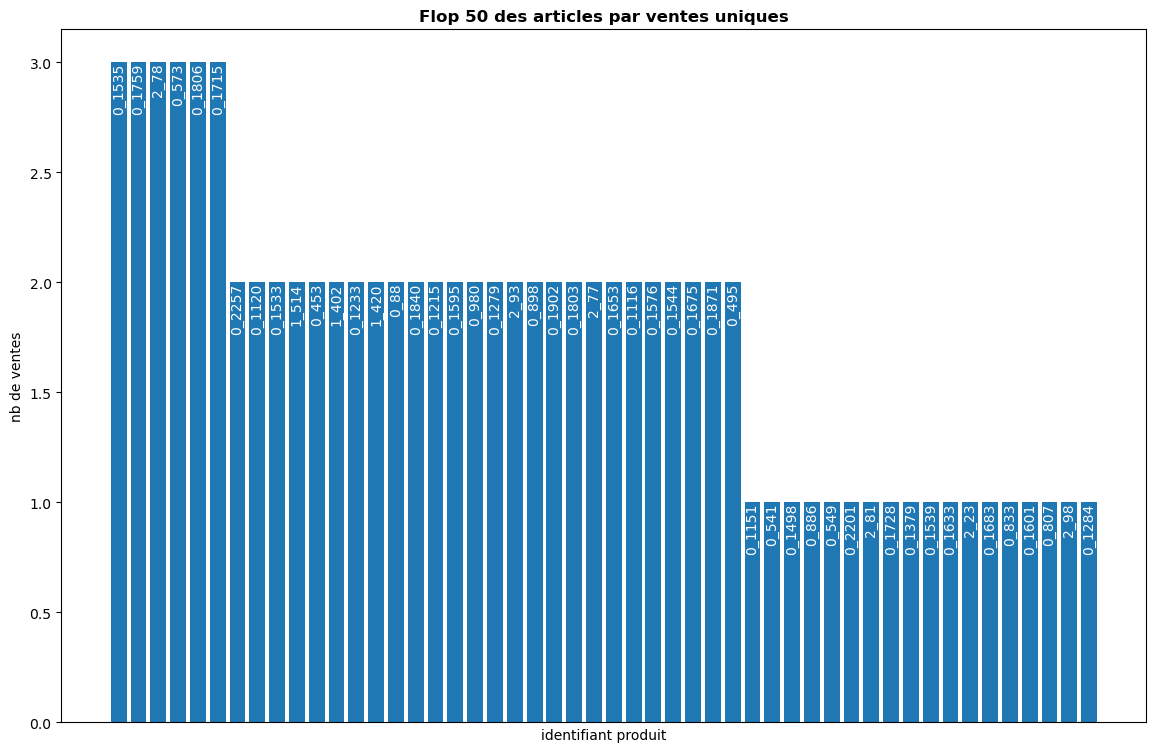

In [134]:
#créer un df avec les quantités par produit
top_produits = data.groupby('id_prod')['id_prod'].count()
top_produits = top_produits.to_frame()
top_produits = top_produits.rename(columns={'id_prod': 'ventes'}).reset_index()
top_produits = top_produits.sort_values('ventes', ascending=False).reset_index(drop=True)
#Afficher les 50 derniers articles en quantités
flop_50_qte = top_produits.sort_values('ventes', ascending=False).iloc[-50:,:].reset_index(drop=True)
#Graphique en barre des 50 derniers articles avec plotly express
plt.figure(figsize=(14,9))
plt.bar(height=flop_50_qte['ventes'], x=flop_50_qte['id_prod'])
plt.title('Flop 50 des articles par ventes uniques', fontweight='bold')
plt.xlabel('identifiant produit')
plt.xticks([])
plt.ylabel('nb de ventes')
for index, value in enumerate(flop_50_qte['ventes']):
    plt.text(index, value, str(flop_50_qte['id_prod'][index]), ha='center', va='top', rotation='vertical', color='white')

**6.3 - Analyse des tops clients par CA**

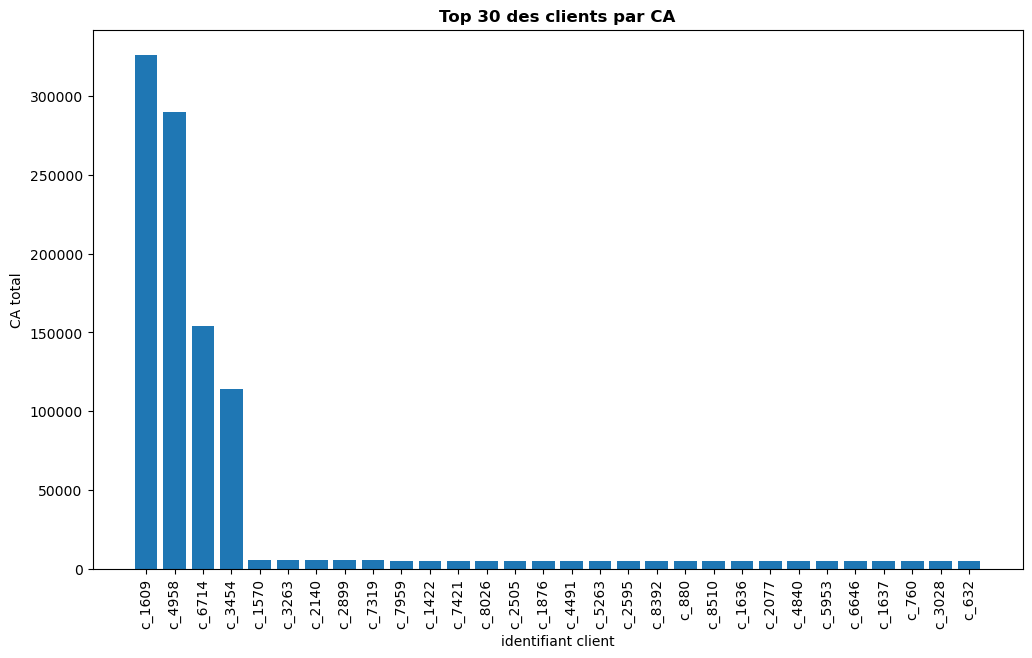

In [137]:
import matplotlib.pyplot as plt

# Création d'un df avec le montant total des achats par client unique
montant_total_achats = data.groupby('client_id').agg({'price':'sum'})
montant_total_achats = montant_total_achats.reset_index()
montant_total_achats = montant_total_achats.rename(columns={'price': 'montant_achats'})

# Afficher les 30 premiers clients en CA total
top_30_qte = montant_total_achats.sort_values('montant_achats', ascending=False).iloc[:30,:].reset_index(drop=True)

# Graphique en barre des 30 premiers clients avec matplotlib
plt.figure(figsize=(12,7))
plt.bar(top_30_qte['client_id'], top_30_qte['montant_achats'])
plt.title('Top 30 des clients par CA', fontweight='bold')
plt.xlabel('identifiant client')
plt.ylabel('CA total')

# Afficher les identifiants des clients sur l'axe x
plt.xticks(rotation=90)
plt.show()

# **Etape 7 - Analyse des profils de clients**

**7.1 - Répartition du CA pour les clients B2B**

In [138]:
#pas de données sur les profils de clients à part l'âge et le sexe

**7.2 - Courbe de Lorenz**

**7.2.1 - analyse du CA et quantités par produit unique**

0.6 % des produits génèrent 10 % du chiffre d'affaires total.
1.7 % des produits génèrent 20 % du chiffre d'affaires total.
3.0 % des produits génèrent 30 % du chiffre d'affaires total.
4.8 % des produits génèrent 40 % du chiffre d'affaires total.
7.0 % des produits génèrent 50 % du chiffre d'affaires total.
10.1 % des produits génèrent 60 % du chiffre d'affaires total.
14.5 % des produits génèrent 70 % du chiffre d'affaires total.
21.4 % des produits génèrent 80 % du chiffre d'affaires total.


Text(0.5, 1.0, 'Courbe de Lorenz du CA pour les produits')

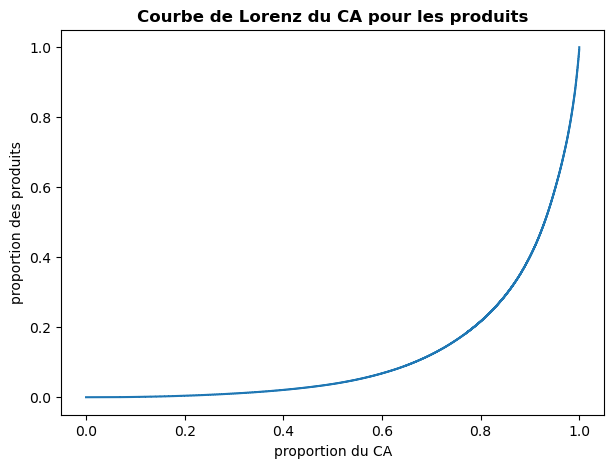

In [139]:
#############################
# Calculer le 20 / 80 en CA #
#############################

#création d'un dataframe avec le CA par produit
data_CA_produit = data.groupby('id_prod')['price'].sum()
data_CA_produit = data_CA_produit.to_frame().reset_index()
data_CA_produit = data_CA_produit.sort_values('price', ascending=False).reset_index(drop=True)
#variable CA total
CA_total = data_CA_produit['price'].sum()
#Créer une colonne calculant la part du CA de la ligne dans le dataset
data_CA_produit['CA_PCT'] = data_CA_produit['price'] / CA_total
#Créer une colonne réalisant la somme cumulative de la colonne précedemment créée
data_CA_produit['F_cum_CA'] = data_CA_produit['CA_PCT'].cumsum()
#Grâce au deux colonnes créées précedemment, calculer le nombre d'articles représentant 80% du CA
#Afficher la proportion que représentent ce groupe d'articles dans le catalogue entier du site web
NB_articles = len(data_CA_produit)
for i in range (1, 9, 1):
    PCT = data_CA_produit.loc[data_CA_produit['F_cum_CA'] < i/10,:].reset_index(drop=True)
    NB_articles_PCT = len(PCT)
    proportion = NB_articles_PCT / NB_articles
    print('{} % des produits génèrent {} % du chiffre d\'affaires total.'.format(round(proportion * 100, 1), i*10))
#Courbe de Pareto
plt.figure(figsize=(7,5))
CA = data_CA_produit['price']
dep = CA.values
n = len(dep)
lorenz = np.cumsum(np.sort(dep)) / dep.sum()
lorenz = np.append([0],lorenz)
xaxis = np.linspace(0-1/n,1+1/n,n+1)
plt.plot(xaxis,lorenz,drawstyle='steps-post')
plt.ylabel('proportion des produits')
plt.xlabel('proportion du CA')
plt.title('Courbe de Lorenz du CA pour les produits', fontweight='bold')

1.1 % des produits génèrent 10 % des ventes unitaires.
2.8 % des produits génèrent 20 % des ventes unitaires.
4.7 % des produits génèrent 30 % des ventes unitaires.
7.0 % des produits génèrent 40 % des ventes unitaires.
9.9 % des produits génèrent 50 % des ventes unitaires.
13.4 % des produits génèrent 60 % des ventes unitaires.
18.0 % des produits génèrent 70 % des ventes unitaires.
24.8 % des produits génèrent 80 % des ventes unitaires.


Text(0.5, 1.0, 'Courbe de Lorenz des ventes unitaires pour les produits')

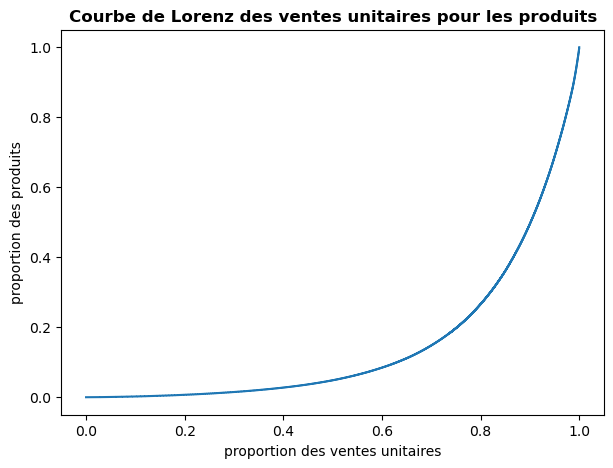

In [140]:
#############################
# Calculer le 20 / 80 en quantités #
#############################

#création d'un dataframe avec les quantités par produits
data_qte_produit = data.groupby('id_prod')['id_prod'].count()
data_qte_produit = data_qte_produit.to_frame()
data_qte_produit = data_qte_produit.rename(columns={'id_prod': 'ventes'}).reset_index()
data_qte_produit = data_qte_produit.sort_values('ventes', ascending=False).reset_index(drop=True)
#variable quantités totales
qte_total = data_qte_produit['ventes'].sum()
#Créer une colonne calculant la part des qtés de la ligne dans le dataset
data_qte_produit['qte_PCT'] = data_qte_produit['ventes'] / qte_total
#Créer une colonne réalisant la somme cumulative de la colonne précedemment créée
data_qte_produit['F_cum_qte'] = data_qte_produit['qte_PCT'].cumsum()
#Grâce au deux colonnes créées précedemment, calculer le nombre d'articles représentant 80% du CA
#Afficher la proportion que représentent ce groupe d'articles dans le catalogue entier du site web
NB_articles = len(data_qte_produit)
for i in range (1, 9, 1):
    PCT = data_CA_produit.loc[data_qte_produit['F_cum_qte'] < i/10,:].reset_index(drop=True)
    NB_articles_PCT = len(PCT)
    proportion = NB_articles_PCT / NB_articles
    print('{} % des produits génèrent {} % des ventes unitaires.'.format(round(proportion * 100, 1), i*10))
#Courbe de Pareto
plt.figure(figsize=(7,5))
CA = data_qte_produit['ventes']
dep = CA.values
n = len(dep)
lorenz = np.cumsum(np.sort(dep)) / dep.sum()
lorenz = np.append([0],lorenz)
xaxis = np.linspace(0-1/n,1+1/n,n+1)
plt.plot(xaxis,lorenz,drawstyle='steps-post')
plt.ylabel('proportion des produits')
plt.xlabel('proportion des ventes unitaires')
plt.title('Courbe de Lorenz des ventes unitaires pour les produits', fontweight='bold')

**7.2.2 - analyse du CA et quantités par client unique**

0.8 % des clients génèrent 10 % du chiffre d'affaires total.
4.6 % des clients génèrent 20 % du chiffre d'affaires total.
9.2 % des clients génèrent 30 % du chiffre d'affaires total.
14.7 % des clients génèrent 40 % du chiffre d'affaires total.
21.3 % des clients génèrent 50 % du chiffre d'affaires total.
29.1 % des clients génèrent 60 % du chiffre d'affaires total.
38.5 % des clients génèrent 70 % du chiffre d'affaires total.
50.3 % des clients génèrent 80 % du chiffre d'affaires total.


Text(0.5, 1.0, 'Courbe de Lorenz du CA pour les clients uniques')

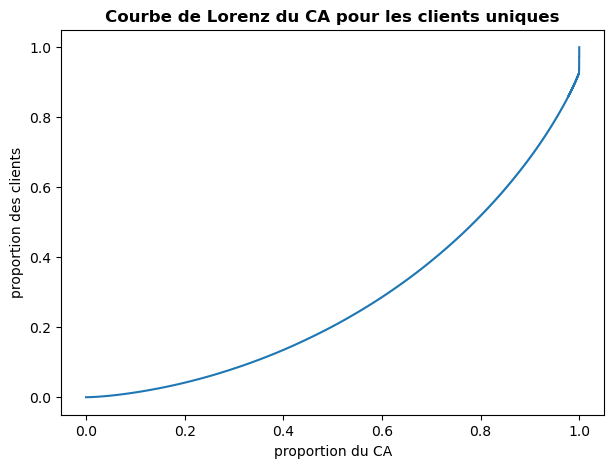

In [141]:
#############################
# Calculer le 20 / 80 en CA #
#############################

#création d'un dataframe avec le CA par client
data_CA_produit = data.groupby('client_id')['price'].sum()
data_CA_produit = data_CA_produit.to_frame().reset_index()
data_CA_produit = data_CA_produit.sort_values('price', ascending=False).reset_index(drop=True)
#variable CA total
CA_total = data_CA_produit['price'].sum()
#Créer une colonne calculant la part du CA de la ligne dans le dataset
data_CA_produit['CA_PCT'] = data_CA_produit['price'] / CA_total
#Créer une colonne réalisant la somme cumulative de la colonne précedemment créée
data_CA_produit['F_cum_CA'] = data_CA_produit['CA_PCT'].cumsum()
#Grâce au deux colonnes créées précedemment, calculer le nombre d'articles représentant 80% du CA
#Afficher la proportion que représentent ce groupe d'articles dans le catalogue entier du site web
NB_articles = len(data_CA_produit)
for i in range (1, 9, 1):
    PCT = data_CA_produit.loc[data_CA_produit['F_cum_CA'] < i/10,:].reset_index(drop=True)
    NB_articles_PCT = len(PCT)
    proportion = NB_articles_PCT / NB_articles
    print('{} % des clients génèrent {} % du chiffre d\'affaires total.'.format(round(proportion * 100, 1), i*10))
#Courbe de Pareto
plt.figure(figsize=(7,5))
CA = data_CA_produit['price']
dep = CA.values
n = len(dep)
lorenz = np.cumsum(np.sort(dep)) / dep.sum()
lorenz = np.append([0],lorenz)
xaxis = np.linspace(0-1/n,1+1/n,n+1)
plt.plot(xaxis,lorenz,drawstyle='steps-post')
plt.ylabel('proportion des clients')
plt.xlabel('proportion du CA')
plt.title('Courbe de Lorenz du CA pour les clients uniques', fontweight='bold')

0.8 % des clients génèrent 10 % des ventes unitaires.
3.6 % des clients génèrent 20 % des ventes unitaires.
7.2 % des clients génèrent 30 % des ventes unitaires.
11.7 % des clients génèrent 40 % des ventes unitaires.
17.5 % des clients génèrent 50 % des ventes unitaires.
24.8 % des clients génèrent 60 % des ventes unitaires.
34.2 % des clients génèrent 70 % des ventes unitaires.
46.4 % des clients génèrent 80 % des ventes unitaires.


Text(0.5, 1.0, 'Courbe de Lorenz des ventes unitaires pour les clients')

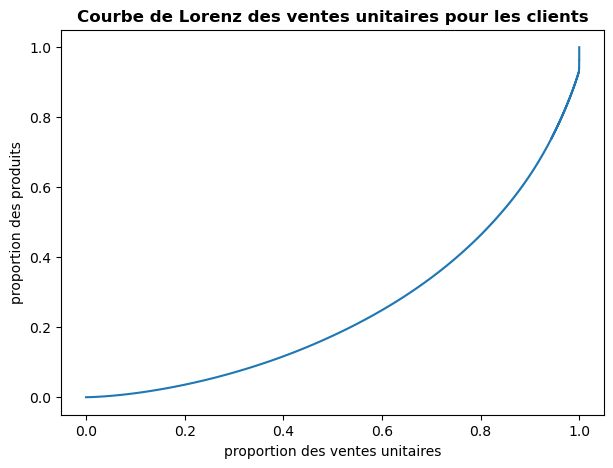

In [142]:
#############################
# Calculer le 20 / 80 en quantités #
#############################

#création d'un dataframe avec les quantités par produits
data_qte_produit = data.groupby('client_id')['id_prod'].count()
data_qte_produit = data_qte_produit.to_frame()
data_qte_produit = data_qte_produit.rename(columns={'id_prod': 'ventes'}).reset_index()
data_qte_produit = data_qte_produit.sort_values('ventes', ascending=False).reset_index(drop=True)
#variable quantités totales
qte_total = data_qte_produit['ventes'].sum()
#Créer une colonne calculant la part des qtés de la ligne dans le dataset
data_qte_produit['qte_PCT'] = data_qte_produit['ventes'] / qte_total
#Créer une colonne réalisant la somme cumulative de la colonne précedemment créée
data_qte_produit['F_cum_qte'] = data_qte_produit['qte_PCT'].cumsum()
#Grâce au deux colonnes créées précedemment, calculer le nombre d'articles représentant 80% du CA
#Afficher la proportion que représentent ce groupe d'articles dans le catalogue entier du site web
NB_articles = len(data_qte_produit)
for i in range (1, 9, 1):
    PCT = data_CA_produit.loc[data_qte_produit['F_cum_qte'] < i/10,:].reset_index(drop=True)
    NB_articles_PCT = len(PCT)
    proportion = NB_articles_PCT / NB_articles
    print('{} % des clients génèrent {} % des ventes unitaires.'.format(round(proportion * 100, 1), i*10))
#Courbe de Pareto
plt.figure(figsize=(7,5))
CA = data_qte_produit['ventes']
dep = CA.values
n = len(dep)
lorenz = np.cumsum(np.sort(dep)) / dep.sum()
lorenz = np.append([0],lorenz)
xaxis = np.linspace(0-1/n,1+1/n,n+1)
plt.plot(xaxis,lorenz,drawstyle='steps-post')
plt.ylabel('proportion des produits')
plt.xlabel('proportion des ventes unitaires')
plt.title('Courbe de Lorenz des ventes unitaires pour les clients', fontweight='bold')

# **Etape 8 - Analyse des corrélations**

**8.1 - Lien entre le genre d’un client et les catégories des livres
achetés**

In [143]:
data = data.astype({'categ':'str'})
#creation du tableau de contingence
X = "sex"
Y = "categ"

cont = data[[X,Y]].pivot_table(index=Y,columns=X,aggfunc=len, margins=True,margins_name="Total")
cont

sex,f,m,Total
categ,,,
0,206103,209356,415459
1,119307,116285,235592
2,17283,19200,36483
Total,342693,344841,687534


In [144]:
#conditions de validités pour un test paramétrique:
#1: Pas d'effectifs théoriques inférieurs à 5 dans les cases du tableau ✓
#2: Les mesures sont indépendantes ✓

In [150]:
import scipy as sp

# test d'association entre deux variables qualitatives (khi² sur un tableau de contingence)
# source : https://help.xlstat.com/fr/6443-which-statistical-test-should-you-use
# H0 = categ et sex sont indépendants
# H1 = categ et sex sont dépendants
chi2, p, dof, expected = sp.stats.chi2_contingency(cont)
#on est sûr à presque 100% que la catégorie du livre et le genre sont des variables dépendantes.
#autrement dit la proportion de femmes ou d'hommes sur le total change significativement d'une catégorie à l'autre

(<Figure size 900x500 with 3 Axes>,
 {('0', 'f'): (0.0, 0.0, 0.5982912038596716, 0.4944369298179824),
  ('0', 'm'): (0.0, 0.497759188954195, 0.5982912038596716, 0.5022408110458049),
  ('1', 'f'): (0.6032416989091766,
   0.0,
   0.3392696302155152,
   0.5047311930338716),
  ('1', 'm'): (0.6032416989091766,
   0.5080534521700842,
   0.3392696302155152,
   0.4919465478299157),
  ('2', 'f'): (0.9474618241741967,
   0.0,
   0.05253817582580331,
   0.4721536440355463),
  ('2', 'm'): (0.9474618241741967,
   0.475475903171759,
   0.05253817582580331,
   0.524524096828241)})

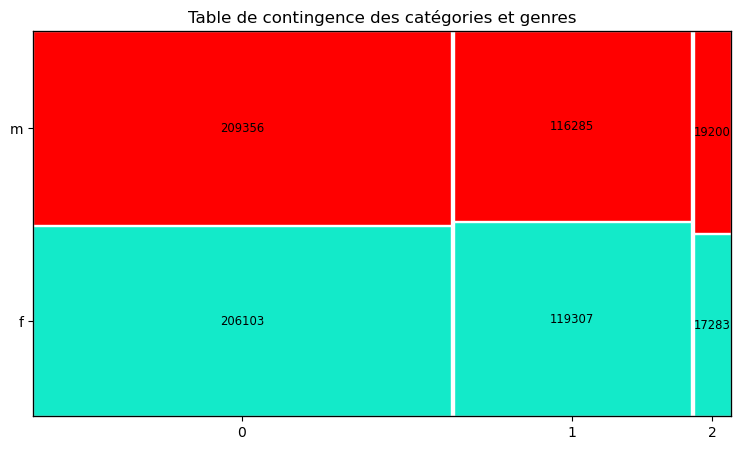

In [151]:
#mosaic
from statsmodels.graphics.mosaicplot import mosaic
plt.rcParams["figure.figsize"]=(9,5)
props={}
props[('0','m')]={'facecolor':'red', 'edgecolor':'white'}
props[('1','m')]={'facecolor':'red', 'edgecolor':'white'}
props[('2','m')]={'facecolor':'red', 'edgecolor':'white'}
props[('0','f')]={'facecolor':'xkcd:aqua','edgecolor':'white'}
props[('1','f')]={'facecolor':'xkcd:aqua','edgecolor':'white'}
props[('2','f')]={'facecolor':'xkcd:aqua','edgecolor':'white'}
labelizer=lambda k:{('0','f'):206103,('0','m'):209356,('1','f'):119307,('1','m'):116285,('2','f'):17283,('2','m'):19200}[k]
mosaic(data, ['categ', 'sex'], labelizer=labelizer, properties=props, title='Table de contingence des catégories et genres')

**8.2 - Lien entre l'âge des clients et le montant total des achats**

In [152]:
#création d'un df avec le montant total des achats par client unique
montant_total_achats = data.groupby('client_id').agg({'price':'sum', 'age':'mean'})
montant_total_achats = montant_total_achats.reset_index()
montant_total_achats = montant_total_achats.rename(columns={'price': 'montant_achats'})
#analyse des outliers
montant_total_achats = montant_total_achats.sort_values('montant_achats', ascending=False).reset_index(drop=True)
montant_total_achats

,client_id,montant_achats,age
0,c_1609,326039.89,44.0
1,c_4958,290227.03,25.0
2,c_6714,153918.60,56.0
3,c_3454,114110.57,55.0
4,c_1570,5285.82,45.0
...,...,...,...
8595,c_4478,13.36,54.0
8596,c_4648,11.20,20.0
8597,c_8114,9.98,62.0
8598,c_8140,8.30,53.0


<Axes: >

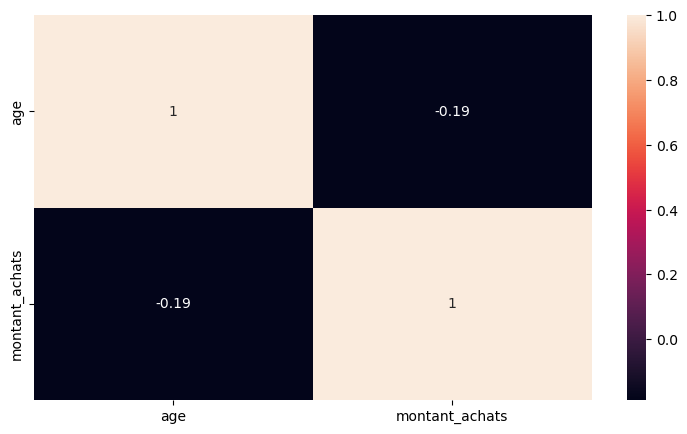

In [153]:
#analyse des outliers : on supprime 4 outliers qui sont probablement des clients B2B
montant_total_achats = montant_total_achats.sort_values('montant_achats', ascending=False).reset_index(drop=True)
montant_total_achats = montant_total_achats.iloc[4:].reset_index(drop=True)
#analyse de la relation avec un heatmap
cols = ['age', 'montant_achats']
heatmap = montant_total_achats[cols]
sns.heatmap(heatmap.corr(), annot=True)

In [154]:
#conditions de validité d'un test de Pearson
#1: Chaque variable suit une distribution normale
#2: Au moins 20 individus dans l'échantillon (recommandé) ✓
from scipy.stats import ks_2samp
#test de Kolmogorov-Smirnov pour checker condition 1
ks_2samp(montant_total_achats["montant_achats"],list(np.random.normal(np.mean(montant_total_achats["montant_achats"]), np.std(montant_total_achats["montant_achats"]), 1000)))
ks_2samp(montant_total_achats["age"],list(np.random.normal(np.mean(montant_total_achats["age"]), np.std(montant_total_achats["age"]), 1000)))
#les deux variables ne suivent pas une distribution normale => test de Spearman

KstestResult(statistic=0.06808515588645882, pvalue=0.00046785591752844784, statistic_location=38.0, statistic_sign=1)

In [155]:
#test d'association entre deux variables quantitatives (corrélation de Spearman)
#H0 = âge et montant_achats sont indépendants
#H1 = âge et montant_achats sont dépendants
sp.stats.spearmanr(montant_total_achats['montant_achats'], montant_total_achats['age'])
#la corrélation est différente de 0 avec une certitude de presque 100%

SignificanceResult(statistic=-0.18453804793783093, pvalue=1.0212910436383555e-66)

Text(0, 0.5, 'montant total des achats (€)')

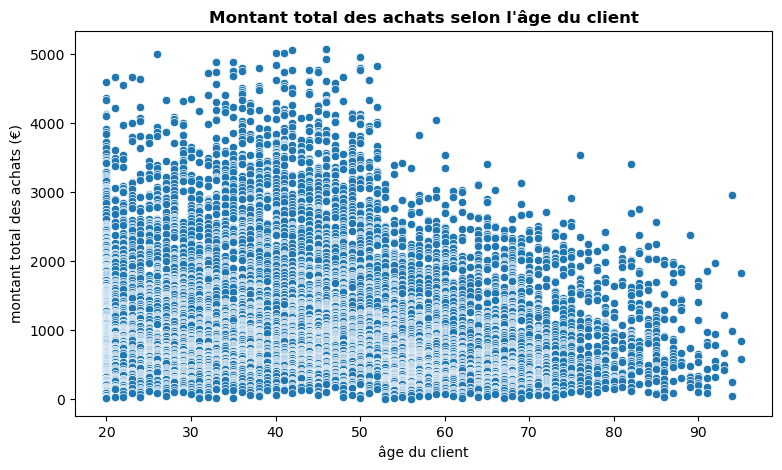

In [157]:
#analyse des outliers : on supprime 4 outliers qui sont probablement des clients B2B
montant_total_achats = montant_total_achats.sort_values('montant_achats', ascending=False).reset_index(drop=True)
montant_total_achats = montant_total_achats.iloc[4:].reset_index(drop=True)
#scatterplot âge/montant_achats
sns.scatterplot(data=montant_total_achats, x='age', y='montant_achats')
plt.title('Montant total des achats selon l\'âge du client', fontweight='bold')
plt.xlabel('âge du client')
plt.ylabel('montant total des achats (€)')

**8.3 - Lien entre l'âge des clients et la fréquence d’achat**

In [158]:
from dateutil import relativedelta
#création d'un df avec le nombre de sessions par clients
frequence_achat = data.groupby('client_id').agg({'session_id':'count', 'age':'mean'})
frequence_achat = frequence_achat.rename(columns={'session_id': 'nb_sessions'})
frequence_achat = frequence_achat.reset_index()
nombre_mois = relativedelta.relativedelta(data['date_jour'].max(), data['date_jour'].min())
nombre_mois = nombre_mois.months + (nombre_mois.years * 12) + (nombre_mois.days / 30)
frequence_achat['freq_achat'] = frequence_achat['nb_sessions']/nombre_mois

In [159]:
#analyse des outliers : on supprime 4 outliers qui sont probablement des clients B2B
frequence_achat = frequence_achat.sort_values('freq_achat', ascending=False).reset_index(drop=True)
frequence_achat = frequence_achat.iloc[4:].reset_index(drop=True)

In [160]:
#conditions de validité d'un test de Pearson
#1: Chaque variable suit une distribution normale
#2: Au moins 20 individus dans l'échantillon (recommandé) ✓
#test de Kolmogorov-Smirnov pour checker condition 1
ks_2samp(frequence_achat["freq_achat"],list(np.random.normal(np.mean(frequence_achat["freq_achat"]), np.std(frequence_achat["freq_achat"]), 1000)))
ks_2samp(frequence_achat["age"],list(np.random.normal(np.mean(frequence_achat["age"]), np.std(frequence_achat["age"]), 1000)))
#les deux variables ne suivent pas une distribution normale => test de Spearman

KstestResult(statistic=0.062, pvalue=0.0019447260593635988, statistic_location=19.67273998795997, statistic_sign=-1)

In [161]:
#test d'association entre deux variables quantitatives (corrélation de Pearson)
#H0 = âge et freq_achat sont indépendants
#H1 = âge et freq_achat sont dépendants
sp.stats.spearmanr(frequence_achat['age'], frequence_achat['freq_achat'])
#la corrélation est différente de 0 avec une certitude de presque 100%

SignificanceResult(statistic=0.12766191018445167, pvalue=1.4497470156818763e-32)

Text(0, 0.5, "fréquence d'achat mensuelle")

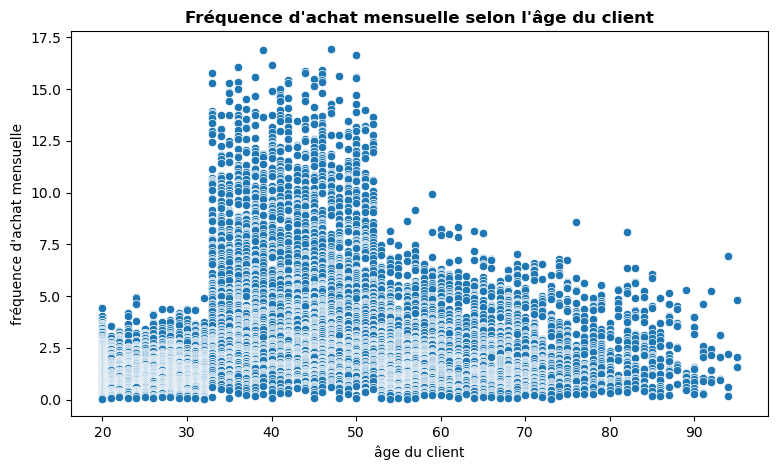

In [162]:
#scatterplot âge/fréquence achat
sns.scatterplot(data=frequence_achat, x='age', y='freq_achat')
plt.title('Fréquence d\'achat mensuelle selon l\'âge du client', fontweight='bold')
plt.xlabel('âge du client')
plt.ylabel('fréquence d\'achat mensuelle')

**8.4 - Lien entre l'âge des clients et la taille du panier moyen**

<Axes: >

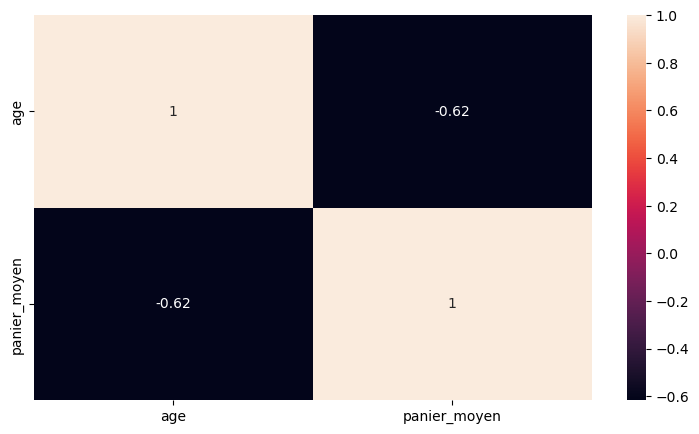

In [163]:
#création d'un df avec le montant du panier moyen par session
montant_moyen = data.groupby(['session_id', 'client_id']).agg({'price':'sum', 'age':'mean'})
montant_moyen = montant_moyen.reset_index()
#création d'un df avec le montant du panier moyen par client
montant_moyen = montant_moyen.groupby('client_id').agg({'price':'mean', 'age':'mean'})
montant_moyen = montant_moyen.reset_index()
montant_moyen = montant_moyen.rename(columns={'price': 'panier_moyen'})
#analyse de la corrélation entre âge et la taille du panier moyen
cols = ['age', 'panier_moyen']
heatmap = montant_moyen[cols]
sns.heatmap(heatmap.corr(), annot=True)

In [164]:
#conditions de validité d'un test de Pearson
#1: Chaque variable suit une distribution normale
#2: Au moins 20 individus dans l'échantillon (recommandé) ✓
#test de Kolmogorov-Smirnov pour checker condition 1
ks_2samp(montant_moyen['age'],list(np.random.normal(np.mean(montant_moyen['age']), np.std(montant_moyen['age']), 1000)))
ks_2samp(montant_moyen['panier_moyen'],list(np.random.normal(np.mean(montant_moyen['panier_moyen']), np.std(montant_moyen['panier_moyen']), 1000)))
#les deux variables ne suivent pas une distribution normale => test de Spearman

KstestResult(statistic=0.1834418604651163, pvalue=7.723084233637944e-27, statistic_location=36.78241935483871, statistic_sign=1)

In [165]:
#test d'association entre deux variables quantitatives (corrélation de Pearson)
#H0 = âge et panier_moyen sont indépendants
#H1 = âge et panier_moyen sont dépendants
sp.stats.spearmanr(montant_moyen['age'], montant_moyen['panier_moyen'])
#la corrélation (négative) est différente de 0 avec une certitude de 100%
#plus l'âge est élevé, moins le montant du panier moyen est élevé

SignificanceResult(statistic=-0.7004400425245074, pvalue=0.0)

Text(0, 0.5, 'montant du panier moyen (€)')

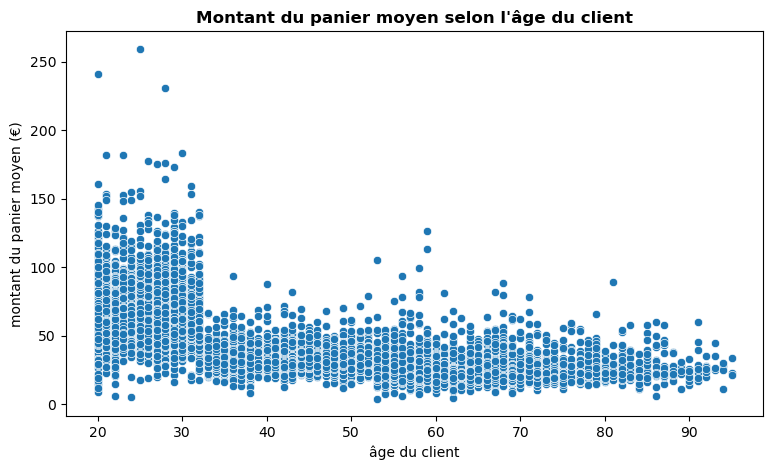

In [166]:
#scatterplot âge/taille panier moyen
sns.scatterplot(data=montant_moyen, x='age', y='panier_moyen')
plt.title('Montant du panier moyen selon l\'âge du client', fontweight='bold')
plt.xlabel('âge du client')
plt.ylabel('montant du panier moyen (€)')

**8.5 - Lien entre l'âge des clients et la catégorie des
livres achetés**

In [167]:
#creation du tableau de contingence (est-ce vraiment utile??)
X = "age"
Y = "categ"

cont = data[[X,Y]].pivot_table(index=X,columns=Y,aggfunc=len, margins=True,margins_name="Total")
cont

categ,0,1,2,Total
age,,,,
20,3418,6067,6012,15497
21,909,1798,1784,4491
22,1016,1850,1845,4711
23,974,1676,1728,4378
24,1114,1744,1671,4529
...,...,...,...,...
92,132,178,2,312
93,77,91,2,170
94,75,161,2,238


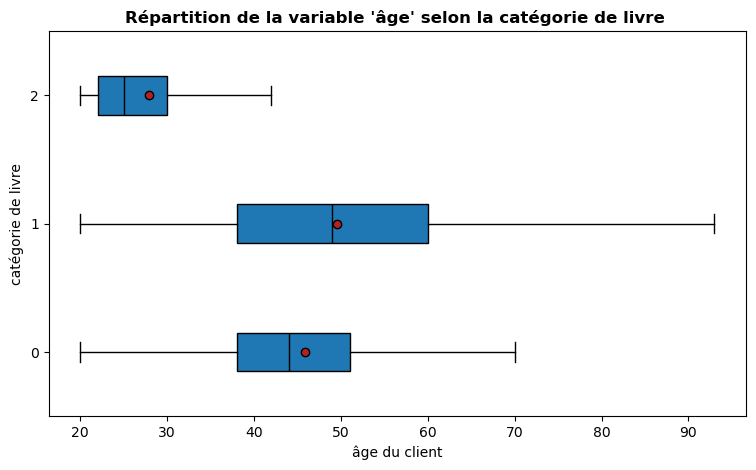

In [168]:
X = "categ" # qualitative
Y = "age" # quantitative

modalites = data[X].unique()
groupes = []
for m in modalites:
    groupes.append(data[data[X]==m][Y])

medianprops = {'color':"black"}
meanprops = {'marker':'o', 'markeredgecolor':'black',
            'markerfacecolor':'firebrick'}

plt.boxplot(groupes, labels=modalites, showfliers=False, medianprops=medianprops,
            vert=False, patch_artist=True, showmeans=True, meanprops=meanprops)
plt.title('Répartition de la variable \'âge\' selon la catégorie de livre ', fontweight='bold')
plt.xlabel('âge du client')
plt.ylabel('catégorie de livre')
plt.show()

## teste d'homoscedasticité , ( le test de Breusch-Pagan).
### vérifier l'homoscedasticité des résidus de mon  modèle de régression avecune moyenne mobile sur une série de temps mensuelle avec un lissage exponentiel :

C:\Users\Djamel\AppData\Local\Temp\ipykernel_9520\2194991053.py:16: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  MA_moy = data.set_index('date_mois').groupby(pd.Grouper(freq='M'))[numeric_cols].sum()


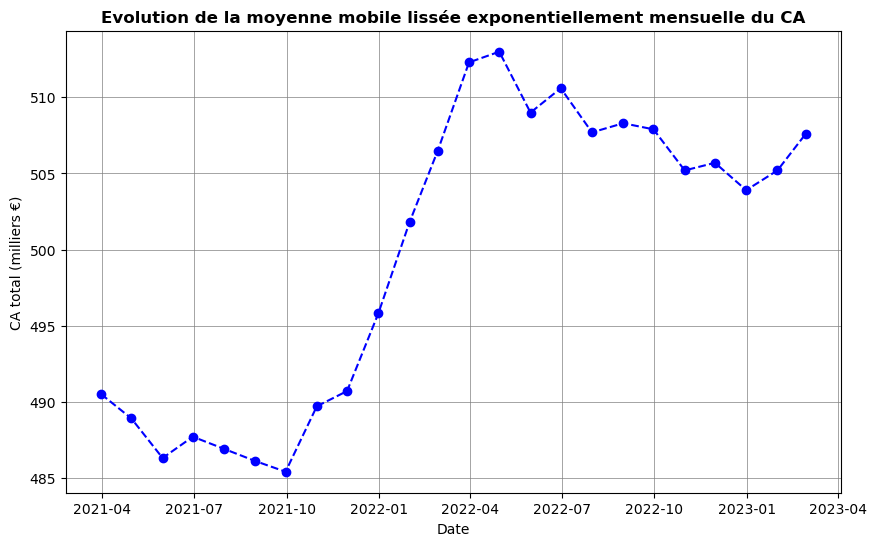

In [176]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.holtwinters import ExponentialSmoothing

# Assurez-vous que la colonne 'date' est de type chaîne de caractères
data = data.astype({'date': 'str'})

# Créez une nouvelle colonne 'date_mois' en format datetime
data['date_mois'] = pd.to_datetime(data['date'].str.slice(0, 7), format='%Y-%m')

# Filtrez les colonnes numériques
numeric_cols = data.select_dtypes(include=[np.number]).columns

# Création du sous-DataFrame 'moyenne mobile CA'
MA_moy = data.set_index('date_mois').groupby(pd.Grouper(freq='M'))[numeric_cols].sum()
MA_moy = MA_moy.drop(columns=['birth', 'age', 'z_score'])

# Appliquer le lissage exponentiel sur la colonne 'price'
model = ExponentialSmoothing(MA_moy['price'], trend=None, seasonal=None, seasonal_periods=None)
fit = model.fit(smoothing_level=0.2)
MA_moy['ES'] = round(fit.fittedvalues / 1000, 1)
MA_moy = MA_moy.reset_index()

# Affichage dans un graphique de la moyenne mobile lissée exponentiellement du CA
plt.figure(figsize=(10, 6))
plt.plot(MA_moy['date_mois'], MA_moy['ES'], marker='o', linestyle='--', color='blue')
plt.title('Evolution de la moyenne mobile lissée exponentiellement mensuelle du CA', fontweight='bold')
plt.xlabel('Date')
plt.ylabel('CA total (milliers €)')
plt.grid(color='gray', linestyle='-', linewidth=0.5)
plt.show()

Statistique du test de Levene : 26975.654952050325, p-value : 0.0
Les variances sont significativement différentes (p < 0.05). L'hypothèse d'homoscedasticité est violée.


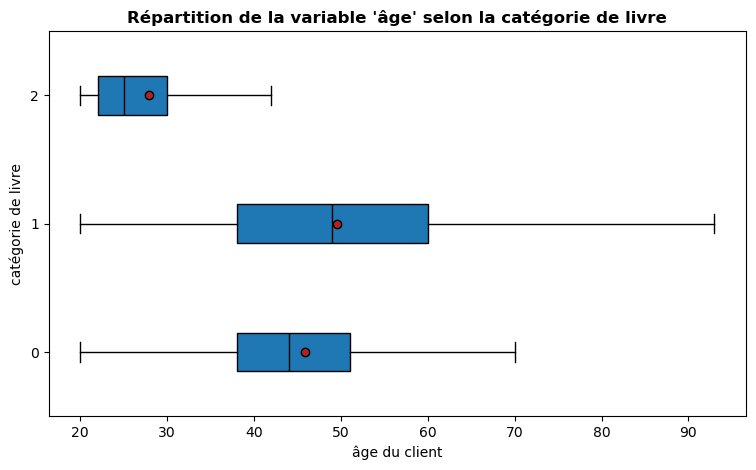

In [184]:
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import levene

# Supposons que les données soient déjà chargées dans le DataFrame `data`
X = "categ"  # variable qualitative
Y = "age"    # variable quantitative

# Définir les groupes en fonction des valeurs uniques dans `categ`
modalites = data[X].unique()
groupes = [data[data[X] == m][Y] for m in modalites]

# Effectuer le test de Levene pour vérifier l'homogénéité des variances
stat, p_value = levene(*groupes)
print(f"Statistique du test de Levene : {stat}, p-value : {p_value}")

# Interprétation de la p-value
if p_value < 0.05:
    print("Les variances sont significativement différentes (p < 0.05). L'hypothèse d'homoscedasticité est violée.")
else:
    print("Les variances ne sont pas significativement différentes (p >= 0.05). L'hypothèse d'homoscedasticité est respectée.")

# Tracer le diagramme en boîte (boxplot)
medianprops = {'color': "black"}
meanprops = {'marker': 'o', 'markeredgecolor': 'black', 'markerfacecolor': 'firebrick'}

plt.boxplot(groupes, labels=modalites, showfliers=False, medianprops=medianprops,
            vert=False, patch_artist=True, showmeans=True, meanprops=meanprops)
plt.title("Répartition de la variable 'âge' selon la catégorie de livre", fontweight='bold')
plt.xlabel("âge du client")
plt.ylabel("catégorie de livre")
plt.show()

#### la p-value est inférieure à 0,05 :
### Cela signifie qu’il y a une différence significative entre les variances des groupes.
### Dans ce cas, l’hypothèse d’homoscedasticité est violée : les variances des groupes sont hétérogènes.
### Conséquence : cela peut affecter certains tests statistiques (comme l’ANOVA classique), car ils supposent généralement une homoscedasticité entre les groupes. Dans ce cas, il pourrait être préférable d'utiliser des tests robustes, comme l'ANOVA de Welch, ou des tests non paramétriques.

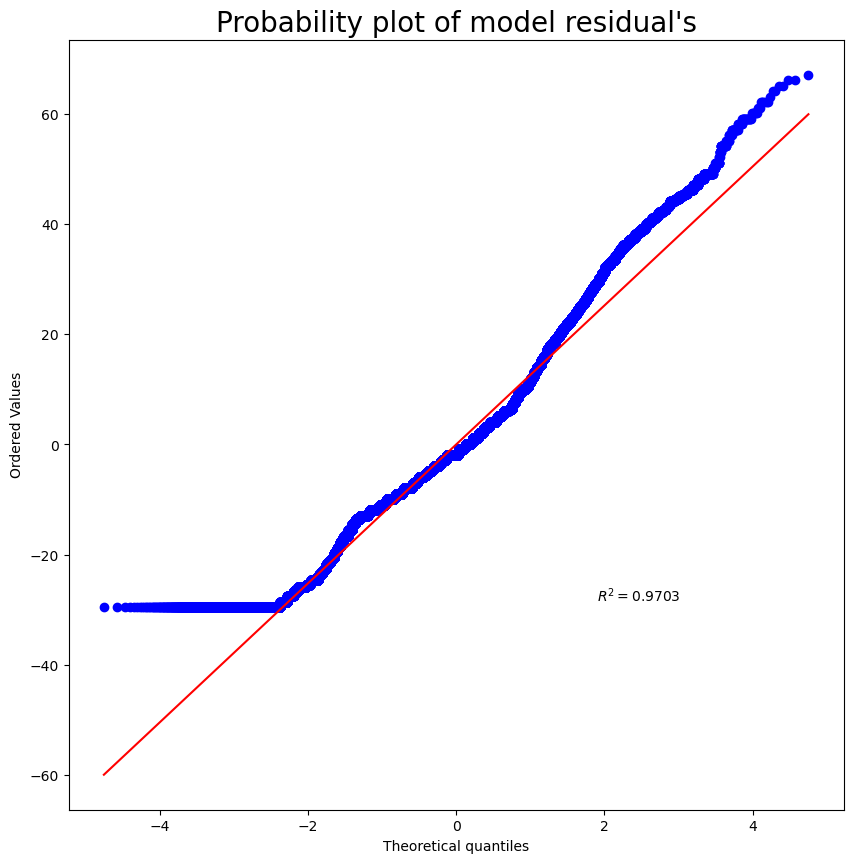

In [192]:
#conditions de validité d'un test paramétrique (source = https://www.pythonfordatascience.org/anova-python/)
#1 Les résidus suivent une distribution normale
#2 Samples have equal variances
#3 independence => all groups are mutually exclusive, i.e. an individual can only belong in one group
import scipy.stats as stats
import statsmodels.api as sm
from statsmodels.formula.api import ols
#1 on checke condition 1
model = ols('age ~ categ', data=data).fit()
aov_table = sm.stats.anova_lm(model, typ=2)

fig = plt.figure(figsize= (10, 10))
ax = fig.add_subplot(111)

normality_plot, stat = stats.probplot(model.resid, plot= plt, rvalue= True)
ax.set_title("Probability plot of model residual's", fontsize= 20)
ax.set

plt.show()
#pas de distribution normal des résidus

In [193]:
#calcul du F-statistic en test non paramétrique (Kruskal)
stats.kruskal(data['age'][data['categ'] == '0'],
              data['age'][data['categ'] == '1'],
              data['age'][data['categ'] == '2'])

KruskalResult(statistic=78458.43837285662, pvalue=0.0)

In [194]:
# test ANOVA : calcul de la corrélation η2 (source: https://openclassrooms.com/fr/courses/7410486-nettoyez-et-analysez-votre-jeu-de-donnees/7428558-analysez-une-variable-quantitative-et-une-qualitative-par-anova)
def eta_squared(x,y):
    moyenne_y = y.mean()
    classes = []
    for classe in x.unique():
        yi_classe = y[x==classe]
        classes.append({'ni': len(yi_classe),
                        'moyenne_classe': yi_classe.mean()})
    SCT = sum([(yj-moyenne_y)**2 for yj in y])
    SCE = sum([c['ni']*(c['moyenne_classe']-moyenne_y)**2 for c in classes])
    return SCE/SCT

X = "categ" # qualitative
Y = "age" # quantitative
eta_squared(data[X],data[Y])

0.11602394898416378